In [4]:
import os
import random
import numpy as np
import krippendorff
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from scipy.stats import f_oneway, tukey_hsd, entropy

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)

pd.options.mode.chained_assignment = None

random.seed(1)

In [6]:
dataset_path = os.path.join("Cleaned_AACEmoRepData_GPT4.xlsx")
dataset = pd.read_excel(dataset_path)

words_data = dataset[dataset['representation_type'] == "1"]
vad_data = dataset[dataset['representation_type'] == "2"]
vadnum_data = dataset[dataset['representation_type'] == "3"]
emojis_data = dataset[dataset['representation_type'] == "4"]

response_representation_map = {"1": "Words", "2": "VAD", "3": "Numeric_VAD", "4": "Emojis"}
emotions_map = {
    1: ["Grateful", "Very High Valence, Moderate Arousal, Low Dominance", "Valence: 2.5, Arousal: 0.0, Dominance: -2.5", "😊"],
    3: ["Joyful", "Very High Valence, High Arousal, High Dominance", "Valence: 4.0, Arousal: 1.0, Dominance: 1.0", "😁"],
    5: ["Content", "Very High Valence, High Arousal, Very High Dominance", "Valence: 4.0, Arousal: 0.0, Dominance: 4.0", "😌"],
    7: ["Surprised", "High Valence, Very High Arousal, Moderate Dominance", "Valence: 1.0, Arousal: 2.5, Dominance: -2.5", "😯"],
    9: ["Excited", "Very High Valence, Very High Arousal, High Dominance", "Valence: 2.5, Arousal: 4.0, Dominance: 1.0", "😃"],
    11: ["Impressed", "High Valence, High Arousal, Low Dominance", "Valence: 1.0, Arousal: 1.0, Dominance: -4.0", "🙂"],
    13: ["Proud", "Very High Valence, High Arousal, Very High Dominance", "Valence: 4.0, Arousal: 1.0, Dominance: 2.5", "🤩"],
    15: ["Anxious", "Moderate Valence, High Arousal, Moderate Dominance", "Valence: -1.0, Arousal: 2.5, Dominance: -2.5", "😃"],
    17: ["Afraid", "Very Low Valence, Very High Arousal, Low Dominance", "Valence: -5.0, Arousal: 2.5, Dominance: -4.0", "😨"],
    19: ["Terrified", "Very Low Valence, Very High Arousal, Low Dominance", "Valence: -5.0, Arousal: 4.0, Dominance: -4.0", "😱"],
    21: ["Annoyed", "Low Valence, Moderate Arousal, Moderate Dominance", "Valence: -2.5, Arousal: 0.0, Dominance: -1.0", "😒"],
    23: ["Angry", "Low Valence, High Arousal, High Dominance", "Valence: -5.0, Arousal: 2.5, Dominance: 0.0", "😡"],
    25: ["Furious", "Low Valence, Very High Arousal, High Dominance", "Valence: -4.0, Arousal: 4.0, Dominance: 1.0", "🤬"],
    27: ["Sad", "Very Low Valence, Low Arousal, Low Dominance", "Valence: -4.0, Arousal: -2.5, Dominance: -4.0", "🙁"],
    29: ["Devastated", "Very Low Valence, High Arousal, Low Dominance", "Valence: -5.0, Arousal: 1.0, Dominance: -2.5", "😭"],
    31: ["Ashamed", "Low Valence, Mid Arousal, Low Dominance", "Valence: -3.0, Arousal: -1.0, Dominance: -4.0", "😳"],
    33: ["Embarrassed", "Low Valence, High Arousal, Low Dominance", "Valence: -4.0, Arousal: 2.5, Dominance: -2.5", "😥"],
    35: ["Guilty", "Low Valence, High Arousal, Low Dominance", "Valence: -4.0, Arousal: 0.0, Dominance: -4.0", "😬"],
    2: ["Grateful", "Very High Valence,  Moderate Arousal, Low Dominance", "Valence: 2.5, Arousal: 0.0, Dominance: -2.5", "😊"],
    4: ["Joyful", "Very High Valence,  High Arousal, High Dominance", "Valence: 4.0, Arousal: 1.0, Dominance: 1.0", "😁"],
    6: ["Content", "Very High Valence, High Arousal, Very High Dominance", "Valence: 4.0, Arousal: 0.0, Dominance: 4.0", "😌"],
    8: ["Surprised", "High Valence, Very High Arousal, Moderate Dominance", "Valence: 1.0, Arousal: 2.5, Dominance: -2.5", "😯"],
    10: ["Excited", "Very High Valence, Very High Arousal, High Dominance", "Valence: 2.5, Arousal: 4.0, Dominance: 1.0", "😃"],
    12: ["Impressed", "High Valence, High Arousal, Low Dominance", "Valence: 1.0, Arousal: 1.0, Dominance: -4.0", "🙂"],
    14: ["Proud", "Very High Valence, High Arousal, Very High Dominance", "Valence: 4.0, Arousal: 1.0, Dominance: 2.5", "🤩"],
    16: ["Anxious", "Moderate Valence, High Arousal, Moderate Dominance", "Valence: -1.0, Arousal: 2.5, Dominance: -2.5", "😃"],
    18: ["Afraid", "Very Low Valence, Very High Arousal, Low Dominance", "Valence: -5.0, Arousal: 2.5, Dominance: -4.0", "😨"],
    20: ["Terrified", "Very Low Valence, Very High Arousal, Low Dominance", "Valence: -5.0, Arousal: 4.0, Dominance: -4.0", "😱"],
    22: ["Annoyed", "Low Valence, Moderate Arousal, Moderate Dominance", "Valence: -2.5, Arousal: 0.0, Dominance: -1.0", "😒"],
    24: ["Angry", "Low Valence, High Arousal, High Dominance", "Valence: -5.0, Arousal: 2.5, Dominance: 0.0", "😡"],
    26: ["Furious", "Low Valence, Very High Arousal, High Dominance", "Valence: -4.0, Arousal: 4.0, Dominance: 1.0", "🤬"],
    28: ["Sad", "Very Low Valence, Low Arousal, Low Dominance", "Valence: -4.0, Arousal: -2.5, Dominance: -4.0", "🙁"],
    30: ["Devastated", "Very Low Valence, High Arousal, Low Dominance", "Valence: -5.0, Arousal: 1.0, Dominance: -2.5", "😭"],
    32: ["Ashamed", "Low Valence, Mid Arousal, Low Dominance", "Valence: -3.0, Arousal: -1.0, Dominance: -4.0", "😳"],
    34: ["Embarrassed", "Low Valence, High Arousal, Low Dominance", "Valence: -4.0, Arousal: 2.5, Dominance: -2.5", "😥"],
    36: ["Guilty", "Low Valence, High Arousal, Low Dominance", "Valence: -4.0, Arousal: 0.0, Dominance: -4.0", "😬"],
}


In [7]:
dataset["Q573"].dropna()

79     2
80     4
81     2
82     2
83     2
84     2
85     2
86     4
87     2
88     3
89     2
90     2
91     2
92     2
93     2
94     4
95     4
96     2
97     2
98     2
99     4
100    3
101    2
102    2
103    2
104    2
105    2
106    2
107    2
108    🙂
Name: Q573, dtype: object

# Words

In [8]:
words_questions_col_names = [f"Words_Question_{n}" for n in range(1, 37)]
words_questions_data = words_data[words_questions_col_names]

word_data_cols = []

for q_no, col in enumerate(words_questions_col_names):
    words_data_qn = words_questions_data[words_questions_data[col].notna()]
    current_data = words_data_qn[col].tolist()
    while len(current_data) < 8:
        current_data.append("")
    word_data_cols.append(current_data)
    # print(f"{len(words_data_qn)} people answered Words Question {q_no}. Each answer was picked this many times:", words_data_qn[col].value_counts().to_dict())

alpha = krippendorff.alpha(reliability_data=word_data_cols, level_of_measurement='nominal')
print("Kripp's alpha", alpha)

Kripp's alpha 0.11096324709381988


### Per User Likert

First, we get all users who responded t

In [9]:
words_users_list = words_data["Q07"].tolist()

In [10]:
words_convey_scores, words_idsay_scores, words_elsesay_scores = [], [], []

for user in words_users_list:
    curr_user_data = words_data[words_data['Q07'] == user]
    curr_user_data_dropped = curr_user_data.dropna(axis=1, how='any', inplace=True)    
    convey_answers = [curr_user_data[col].tolist()[0] for col in curr_user_data.columns if 'Convey' in col]
    idsay_answers = [curr_user_data[col].tolist()[0] for col in curr_user_data.columns if 'IdSay' in col]
    elsesay_answers = [curr_user_data[col].tolist()[0] for col in curr_user_data.columns if 'ElseSay' in col] 
    convey_avg, idsay_avg, elsesay_avg = np.mean(convey_answers), np.mean(idsay_answers), np.mean(elsesay_answers)
    words_convey_scores.append(convey_avg), words_idsay_scores.append(idsay_avg), words_elsesay_scores.append(elsesay_avg)
    print(f"For User: {user},", "Convey Score:", convey_avg, "I'd Say Score", idsay_avg, "Someone Else Say Score", elsesay_avg)


For User: 578d6aa570c76a000124464b, Convey Score: 4.2 I'd Say Score 3.8 Someone Else Say Score 3.4
For User: 642f45dda7fbedcf5a96c451, Convey Score: 5.0 I'd Say Score 3.8 Someone Else Say Score 3.6
For User: 6483fded206bc517c6ad6d0c, Convey Score: 3.8 I'd Say Score 3.4 Someone Else Say Score 3.4
For User: 6612c334c29da57e3de974e8, Convey Score: 5.0 I'd Say Score 5.0 Someone Else Say Score 3.2
For User: 6400da876003cad093b2118f, Convey Score: 4.0 I'd Say Score 3.4 Someone Else Say Score 3.2
For User: 66587c1a7fb21ffa2e9d2a19, Convey Score: 3.6 I'd Say Score 3.4 Someone Else Say Score 2.8
For User: 65493261b5e0320d0bfccd34, Convey Score: 2.8 I'd Say Score 2.6 Someone Else Say Score 2.6
For User: 6664cf7fbe52905a784f4cad, Convey Score: 3.6 I'd Say Score 3.8 Someone Else Say Score 3.4
For User: 66d74ec32b5c698173db1c68, Convey Score: 4.4 I'd Say Score 4.2 Someone Else Say Score 4.2
For User: 5e0e49cfbf3d4e5b0925b2a3, Convey Score: 3.8 I'd Say Score 3.8 Someone Else Say Score 3.2
For User: 

**For each choice question:**
* Number of answers - 7 on average
* Which answers and how many times - See table
* User agreement (krippendorf's something?) - Full agreement on 11. Average shannon entropy of 0.32 across the whole set of questions.
* Did answers converge more for later questions vs earlier questions? - They did not. Users did not become more confident as they answered more questions.

In [11]:
w_q_data = {
    "Question_Num": [],
    "Num_Answers": [],
    "Answers_Picked": [],
    "Answers_Normalized": [],
    "Shannon_Entropy": []
}

for q_no, col in enumerate(words_questions_col_names):
    words_data_qn = words_questions_data[words_questions_data[col].notna()]
    current_data = words_data_qn[col].tolist()

    response_counts = words_data_qn[col].value_counts().to_dict()
    proportions = {option: response_counts.get(option, 0)/sum(response_counts.values()) for option in [1, 2, 3, 4]}

    w_q_data["Question_Num"].append(q_no+1)
    w_q_data["Num_Answers"].append(len(words_data_qn))
    w_q_data["Answers_Picked"].append(response_counts)
    w_q_data["Answers_Normalized"].append(proportions)
    w_q_data["Shannon_Entropy"].append(entropy(list(proportions.values()), base=4))

w_d_dataframe = pd.DataFrame(w_q_data)

print(
    "Number of Answers for Choice Questions:"
    "\n\tAverage:", w_d_dataframe["Num_Answers"].mean(),
    "\n\tMax:", w_d_dataframe["Num_Answers"].max(),
    "\n\tMin:", w_d_dataframe["Num_Answers"].min(),
    "\n\tMean Entropy:", w_d_dataframe["Shannon_Entropy"].mean()
)

w_d_dataframe

Number of Answers for Choice Questions:
	Average: 7.222222222222222 
	Max: 8 
	Min: 6 
	Mean Entropy: 0.32476219831121195


,Question_Num,Num_Answers,Answers_Picked,Answers_Normalized,Shannon_Entropy
0,1,7,{1: 7},"{1: 1.0, 2: 0.0, 3: 0.0, 4: 0.0}",0.000000
1,2,7,{1: 7},"{1: 1.0, 2: 0.0, 3: 0.0, 4: 0.0}",0.000000
2,3,8,"{2: 4, 1: 2, 4: 2}","{1: 0.25, 2: 0.5, 3: 0.0, 4: 0.25}",0.750000
3,4,7,"{4: 4, 2: 2, 1: 1}","{1: 0.14285714285714285, 2: 0.2857142857142857, 3: 0.0, 4: 0.5714285714285714}",0.689392
4,5,8,"{1: 5, 4: 2, 3: 1}","{1: 0.625, 2: 0.0, 3: 0.125, 4: 0.25}",0.649397
5,6,7,"{1: 5, 4: 2}","{1: 0.7142857142857143, 2: 0.0, 3: 0.0, 4: 0.2857142857142857}",0.431560
6,7,6,"{1: 4, 2: 2}","{1: 0.6666666666666666, 2: 0.3333333333333333, 3: 0.0, 4: 0.0}",0.459148
7,8,7,"{1: 5, 4: 2}","{1: 0.7142857142857143, 2: 0.0, 3: 0.0, 4: 0.2857142857142857}",0.431560
8,9,7,"{2: 4, 1: 3}","{1: 0.42857142857142855, 2: 0.5714285714285714, 3: 0.0, 4: 0.0}",0.492614
9,10,8,"{4: 4, 1: 3, 2: 1}","{1: 0.375, 2: 0.125, 3: 0.0, 4: 0.5}",0.702820


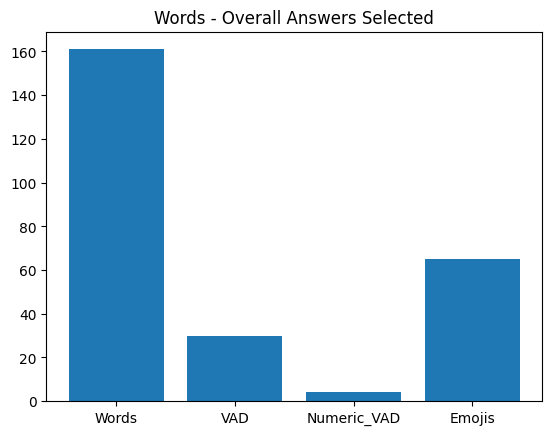

In [12]:
all_words_questions_answers = w_d_dataframe["Answers_Picked"].apply(pd.Series).sum()

all_words_questions_answers.index = all_words_questions_answers.index.astype(str).map(response_representation_map)
all_words_questions_answers = all_words_questions_answers.reindex(list(response_representation_map.values()))

plt.bar(all_words_questions_answers.index, all_words_questions_answers.values)
plt.title("Words - Overall Answers Selected")
plt.show()


In [13]:
w_convey_data = {
    "Question_Num": [],
    "Num_Answers": [],
    "Scores_Given": [],
    "Mean_Score": [],
}

words_convey_col_names = [col for col in words_data.columns if 'Words_Convey' in col]

for q_no, col in enumerate(words_convey_col_names):
    words_data_convey = words_data[words_data[col].notna()]
    current_data = words_data_convey[col].tolist()

    response_counts = words_data_convey[col].value_counts().to_dict()

    w_convey_data["Question_Num"].append(q_no+1)
    w_convey_data["Num_Answers"].append(len(words_data_convey))
    w_convey_data["Scores_Given"].append(response_counts)
    w_convey_data["Mean_Score"].append(sum([score*count for score, count in response_counts.items()])/len(words_data_convey))

w_convey_dataframe = pd.DataFrame(w_convey_data)

print(
    "Words - Scores for How well this Conveys:"
    "\n\tAverage Number of Responses per question:", w_convey_dataframe["Num_Answers"].mean(),
    "\n\tMean Score:", w_convey_dataframe["Mean_Score"].mean(),
    "\n\tStandard Dev of Mean Scores:", w_convey_dataframe["Mean_Score"].std(),
    "\n\tVariance of Mean Score:", w_convey_dataframe["Mean_Score"].var()
)

w_convey_dataframe

Words - Scores for How well this Conveys:
	Average Number of Responses per question: 3.611111111111111 
	Mean Score: 4.168518518518519 
	Standard Dev of Mean Scores: 0.7978719491662268 
	Variance of Mean Score: 0.636599647266314


,Question_Num,Num_Answers,Scores_Given,Mean_Score
0,1,2,"{4: 1, 5: 1}",4.500000
1,2,4,"{4: 3, 5: 1}",4.250000
2,3,6,{2: 6},2.000000
3,4,5,"{5: 4, 4: 1}",4.800000
4,5,4,{5: 4},5.000000
5,6,2,"{5: 1, 3: 1}",4.000000
6,7,4,"{5: 2, 4: 2}",4.500000
7,8,4,"{5: 2, 1: 1, 4: 1}",3.750000
8,9,2,"{1: 1, 2: 1}",1.500000
9,10,8,"{5: 4, 1: 1, 3: 1, 2: 1, 4: 1}",3.750000


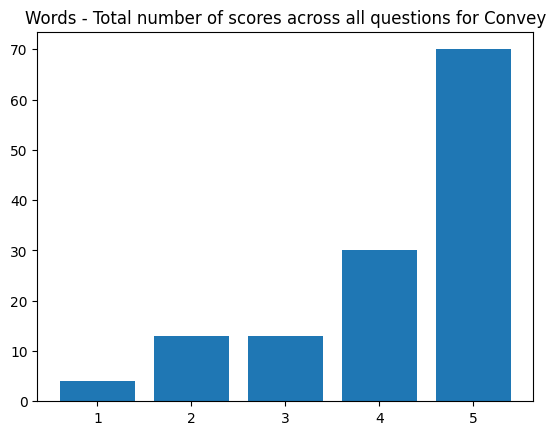

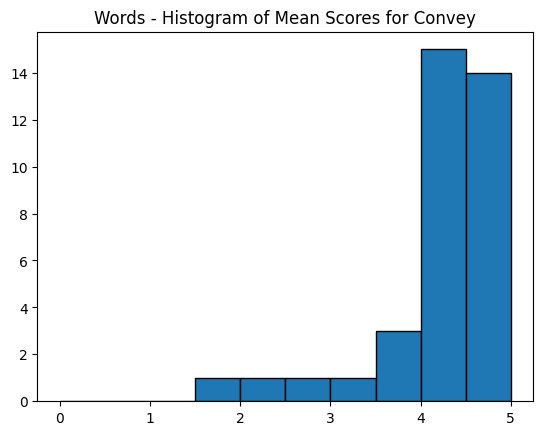

In [14]:
all_words_convey_scores = w_convey_dataframe["Scores_Given"].apply(pd.Series).sum()

all_words_convey_scores = all_words_convey_scores.reindex([1, 2, 3, 4, 5])

all_words_convey_scores
plt.bar(all_words_convey_scores.index, all_words_convey_scores.values)
plt.title("Words - Total number of scores across all questions for Convey")
plt.show()

plt.hist(w_convey_dataframe["Mean_Score"], bins=10, range=(0, 5), edgecolor='black')
plt.title('Words - Histogram of Mean Scores for Convey')
plt.show()



In [15]:
w_idsay_data = {
    "Question_Num": [],
    "Num_Answers": [],
    "Scores_Given": [],
    "Mean_Score": [],
}

words_idsay_col_names = [col for col in words_data.columns if 'Words_IdSay' in col]

for q_no, col in enumerate(words_idsay_col_names):
    words_data_idsay = words_data[words_data[col].notna()]
    current_data = words_data_idsay[col].tolist()

    response_counts = words_data_idsay[col].value_counts().to_dict()

    w_idsay_data["Question_Num"].append(q_no+1)
    w_idsay_data["Num_Answers"].append(len(words_data_idsay))
    w_idsay_data["Scores_Given"].append(response_counts)
    w_idsay_data["Mean_Score"].append(sum([score*count for score, count in response_counts.items()])/len(words_data_idsay))

w_idsay_dataframe = pd.DataFrame(w_idsay_data)

print(
    "Scores for How much I'd say this:"
    "\n\tAverage Number of Responses per question:", w_idsay_dataframe["Num_Answers"].mean(),
    "\n\tMean Score:", w_idsay_dataframe["Mean_Score"].mean(),
    "\n\tStandard Dev of Mean Scores:", w_idsay_dataframe["Mean_Score"].std(),
    "\n\tVariance of Mean Score:", w_idsay_dataframe["Mean_Score"].var()
)

w_idsay_dataframe

Scores for How much I'd say this:
	Average Number of Responses per question: 3.611111111111111 
	Mean Score: 3.9967592592592585 
	Standard Dev of Mean Scores: 0.7602821055835437 
	Variance of Mean Score: 0.5780288800705468


,Question_Num,Num_Answers,Scores_Given,Mean_Score
0,1,2,"{1: 1, 5: 1}",3.000000
1,2,4,"{2: 3, 5: 1}",2.750000
2,3,6,"{2: 2, 4: 2, 3: 1, 5: 1}",3.333333
3,4,5,"{5: 3, 4: 2}",4.600000
4,5,4,{5: 4},5.000000
5,6,2,{5: 2},5.000000
6,7,4,"{4: 3, 5: 1}",4.250000
7,8,4,"{4: 2, 2: 1, 1: 1}",2.750000
8,9,2,"{1: 1, 5: 1}",3.000000
9,10,8,"{5: 2, 2: 2, 4: 2, 1: 1, 3: 1}",3.250000


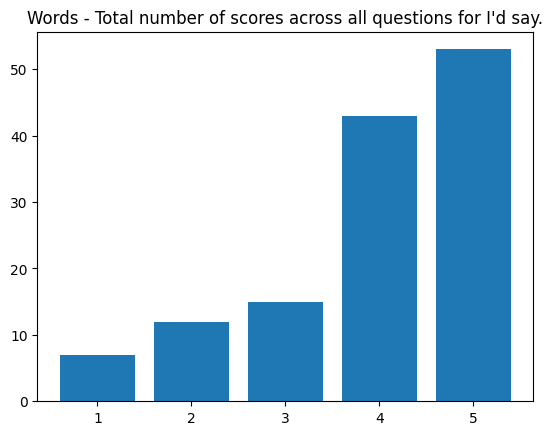

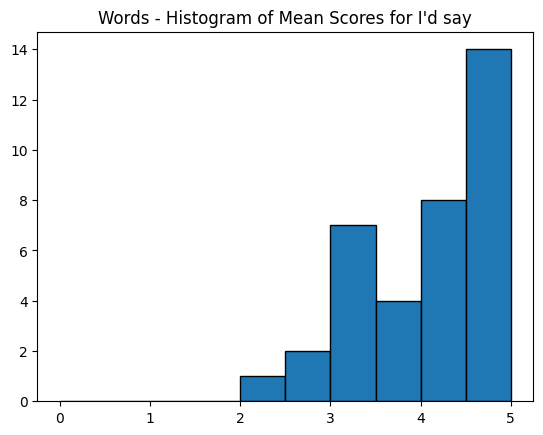

In [16]:
all_words_idsay_scores = w_idsay_dataframe["Scores_Given"].apply(pd.Series).sum()

all_words_idsay_scores = all_words_idsay_scores.reindex([1, 2, 3, 4, 5])

all_words_idsay_scores
plt.bar(all_words_idsay_scores.index, all_words_idsay_scores.values)
plt.title("Words - Total number of scores across all questions for I'd say.")
plt.show()

plt.hist(w_idsay_dataframe["Mean_Score"], bins=10, range=(0, 5), edgecolor='black')
plt.title("Words - Histogram of Mean Scores for I'd say")
plt.show()

In [17]:
w_elsesay_data = {
    "Question_Num": [],
    "Num_Answers": [],
    "Scores_Given": [],
    "Mean_Score": [],
}

words_elsesay_col_names = [col for col in words_data.columns if 'Words_ElseSay' in col]

for q_no, col in enumerate(words_elsesay_col_names):
    words_data_elsesay = words_data[words_data[col].notna()]
    current_data = words_data_elsesay[col].tolist()

    response_counts = words_data_elsesay[col].value_counts().to_dict()

    w_elsesay_data["Question_Num"].append(q_no+1)
    w_elsesay_data["Num_Answers"].append(len(words_data_elsesay))
    w_elsesay_data["Scores_Given"].append(response_counts)
    w_elsesay_data["Mean_Score"].append(sum([score*count for score, count in response_counts.items()])/len(words_data_elsesay))

w_elsesay_dataframe = pd.DataFrame(w_elsesay_data)

print(
    "Scores for How much I'd hear someone else say this:"
    "\n\tAverage Number of Responses per question:", w_elsesay_dataframe["Num_Answers"].mean(),
    "\n\tMean Score:", w_elsesay_dataframe["Mean_Score"].mean(),
    "\n\tStandard Dev of Mean Scores:", w_elsesay_dataframe["Mean_Score"].std(),
    "\n\tVariance of Mean Score:", w_elsesay_dataframe["Mean_Score"].var()
)

w_elsesay_dataframe

Scores for How much I'd hear someone else say this:
	Average Number of Responses per question: 3.611111111111111 
	Mean Score: 3.3462962962962965 
	Standard Dev of Mean Scores: 0.9628175510886282 
	Variance of Mean Score: 0.9270176366843031


,Question_Num,Num_Answers,Scores_Given,Mean_Score
0,1,2,"{1: 1, 5: 1}",3.000000
1,2,4,{2: 4},2.000000
2,3,6,"{2: 3, 4: 2, 1: 1}",2.500000
3,4,5,"{5: 2, 4: 2, 2: 1}",4.000000
4,5,4,{5: 4},5.000000
5,6,2,{5: 2},5.000000
6,7,4,"{4: 2, 3: 2}",3.500000
7,8,4,"{1: 2, 2: 1, 5: 1}",2.250000
8,9,2,"{1: 1, 5: 1}",3.000000
9,10,8,"{5: 2, 1: 2, 2: 2, 4: 2}",3.000000


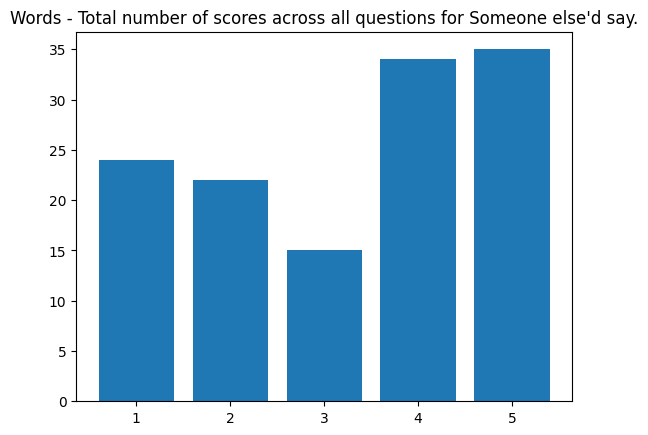

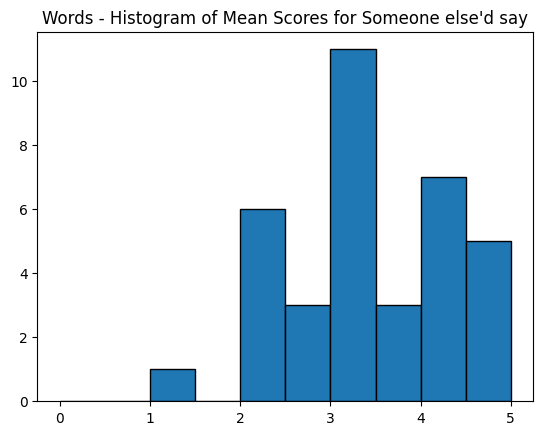

In [18]:
all_words_elsesay_scores = w_elsesay_dataframe["Scores_Given"].apply(pd.Series).sum()

all_words_elsesay_scores = all_words_elsesay_scores.reindex([1, 2, 3, 4, 5])

all_words_elsesay_scores
plt.bar(all_words_elsesay_scores.index, all_words_elsesay_scores.values)
plt.title("Words - Total number of scores across all questions for Someone else'd say.")
plt.show()

plt.hist(w_elsesay_dataframe["Mean_Score"], bins=10, range=(0, 5), edgecolor='black')
plt.title("Words - Histogram of Mean Scores for Someone else'd say")
plt.show()

# VAD

In [19]:
vad_questions_col_names = [f"VAD_Question_{n}" for n in range(1, 37)]
vad_questions_data = vad_data[vad_questions_col_names]

vad_data_cols = []

for q_no, col in enumerate(vad_questions_col_names):
    vad_data_qn = vad_questions_data[vad_questions_data[col].notna()]
    current_data = vad_data_qn[col].tolist()
    while len(current_data) < 9:
        current_data.append("")
    vad_data_cols.append(current_data)
    # print(f"{len(vad_data_qn)} people answered VAD Question {q_no}. Each answer was picked this many times:", vad_data_qn[col].value_counts().to_dict())

alpha = krippendorff.alpha(reliability_data=vad_data_cols, level_of_measurement='nominal')
print("Kripp's alpha", alpha)

Kripp's alpha 0.2270479822988648


### Per User Likert

In [20]:
vad_users_list = vad_data["Q07"].tolist()

In [21]:
vad_convey_scores, vad_idsay_scores, vad_elsesay_scores = [], [], []

for user in vad_users_list:
    curr_user_data = vad_data[vad_data['Q07'] == user]    
    curr_user_data_dropped = curr_user_data.dropna(axis=1, how='any', inplace=True)    
    convey_answers = [curr_user_data[col].tolist()[0] for col in curr_user_data.columns if 'Convey' in col]
    idsay_answers = [curr_user_data[col].tolist()[0] for col in curr_user_data.columns if 'IdSay' in col]
    elsesay_answers = [curr_user_data[col].tolist()[0] for col in curr_user_data.columns if 'ElseSay' in col] 
    convey_avg, idsay_avg, elsesay_avg = np.mean(convey_answers), np.mean(idsay_answers), np.mean(elsesay_answers)
    vad_convey_scores.append(convey_avg), vad_idsay_scores.append(idsay_avg), vad_elsesay_scores.append(elsesay_avg)
    print(f"For User: {user},", "Convey Score:", convey_avg, "I'd Say Score", idsay_avg, "Someone Else Say Score", elsesay_avg)


For User: 63279085ec65a992cc521187, Convey Score: 4.2 I'd Say Score 4.6 Someone Else Say Score 4.4
For User: 669c314f68f0e80e7e761d8c, Convey Score: 3.6 I'd Say Score 4.4 Someone Else Say Score 3.8
For User: 667a03f906da667dff4fc82b, Convey Score: 4.4 I'd Say Score 4.0 Someone Else Say Score 4.0
For User: 66b25667f708841ca30bbf9c, Convey Score: 3.6 I'd Say Score 3.0 Someone Else Say Score 1.2
For User: 5c05f8e06c86270001e0378f, Convey Score: 4.2 I'd Say Score 2.6 Someone Else Say Score 1.2
For User: 6726af23afe2dd23307afe20, Convey Score: 3.4 I'd Say Score 3.4 Someone Else Say Score 3.8
For User: 60ff3613da8baf747efb64d4, Convey Score: 4.0 I'd Say Score 3.6 Someone Else Say Score 2.8
For User: 6160e0e3a8156e01fe3e95a6, Convey Score: 3.8 I'd Say Score 3.2 Someone Else Say Score 3.0
For User: 5fdac85f90a6137a11b4a415, Convey Score: 3.4 I'd Say Score 3.6 Someone Else Say Score 3.8
For User: 671aab2a274389facf530c95, Convey Score: 4.6 I'd Say Score 4.0 Someone Else Say Score 3.2
For User: 

**For each choice question:**
* Number of answers - 7 on average
* Which answers and how many times - See table
* User agreement (krippendorf's something?) - Full agreement on none. Average shannon entropy of 0.61 across the whole set of questions.
* Did answers converge more for later questions vs earlier questions? - They did not. Users did not become more confident as they answered more questions.

In [22]:
vad_q_data = {
    "Question_Num": [],
    "Num_Answers": [],
    "Answers_Picked": [],
    "Answers_Normalized": [],
    "Shannon_Entropy": []
}

for q_no, col in enumerate(vad_questions_col_names):
    vad_data_qn = vad_questions_data[vad_questions_data[col].notna()]
    current_data = vad_data_qn[col].tolist()

    response_counts = vad_data_qn[col].value_counts().to_dict()
    proportions = {option: response_counts.get(option, 0)/sum(response_counts.values()) for option in [1, 2, 3, 4]}

    vad_q_data["Question_Num"].append(q_no+1)
    vad_q_data["Num_Answers"].append(len(vad_data_qn))
    vad_q_data["Answers_Picked"].append(response_counts)
    vad_q_data["Answers_Normalized"].append(proportions)
    vad_q_data["Shannon_Entropy"].append(entropy(list(proportions.values()), base=4))

vad_d_dataframe = pd.DataFrame(vad_q_data)

print(
    "Number of Answers for VAD Choice Questions:"
    "\n\tAverage:", vad_d_dataframe["Num_Answers"].mean(),
    "\n\tMax:", vad_d_dataframe["Num_Answers"].max(),
    "\n\tMin:", vad_d_dataframe["Num_Answers"].min(),
    "\n\tMean Entropy:", vad_d_dataframe["Shannon_Entropy"].mean()
)

vad_d_dataframe

Number of Answers for VAD Choice Questions:
	Average: 6.944444444444445 
	Max: 9 
	Min: 5 
	Mean Entropy: 0.6107393068164244


,Question_Num,Num_Answers,Answers_Picked,Answers_Normalized,Shannon_Entropy
0,1,8,"{2: 6, 1: 1, 3: 1}","{1: 0.125, 2: 0.75, 3: 0.125, 4: 0.0}",0.530639
1,2,8,"{3: 3, 1: 2, 2: 2, 4: 1}","{1: 0.25, 2: 0.25, 3: 0.375, 4: 0.125}",0.952820
2,3,6,"{2: 4, 4: 1, 1: 1}","{1: 0.16666666666666666, 2: 0.6666666666666666, 3: 0.0, 4: 0.16666666666666666}",0.625815
3,4,7,"{2: 5, 1: 2}","{1: 0.2857142857142857, 2: 0.7142857142857143, 3: 0.0, 4: 0.0}",0.431560
4,5,6,"{2: 4, 1: 2}","{1: 0.3333333333333333, 2: 0.6666666666666666, 3: 0.0, 4: 0.0}",0.459148
5,6,7,{2: 7},"{1: 0.0, 2: 1.0, 3: 0.0, 4: 0.0}",0.000000
6,7,7,"{2: 4, 1: 2, 4: 1}","{1: 0.2857142857142857, 2: 0.5714285714285714, 3: 0.0, 4: 0.14285714285714285}",0.689392
7,8,6,"{2: 3, 3: 2, 1: 1}","{1: 0.16666666666666666, 2: 0.5, 3: 0.3333333333333333, 4: 0.0}",0.729574
8,9,7,"{2: 5, 1: 1, 3: 1}","{1: 0.14285714285714285, 2: 0.7142857142857143, 3: 0.14285714285714285, 4: 0.0}",0.574417
9,10,6,"{2: 4, 4: 2}","{1: 0.0, 2: 0.6666666666666666, 3: 0.0, 4: 0.3333333333333333}",0.459148


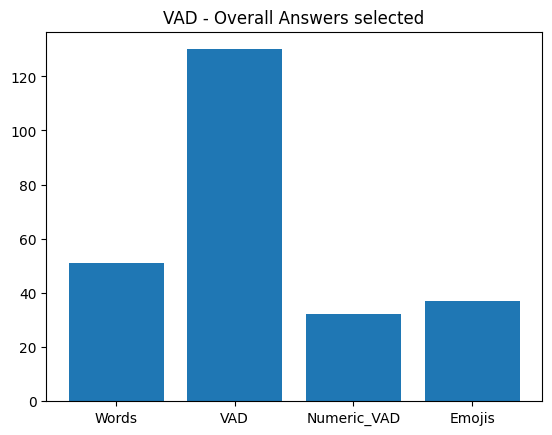

In [23]:
all_vad_questions_answers = vad_d_dataframe["Answers_Picked"].apply(pd.Series).sum()

all_vad_questions_answers.index = all_vad_questions_answers.index.astype(str).map(response_representation_map)
all_vad_questions_answers = all_vad_questions_answers.reindex(list(response_representation_map.values()))

plt.bar(all_vad_questions_answers.index, all_vad_questions_answers.values)
plt.title("VAD - Overall Answers selected")
plt.show()

In [24]:
vad_convey_data = {
    "Question_Num": [],
    "Num_Answers": [],
    "Scores_Given": [],
    "Mean_Score": [],
}

vad_convey_col_names = [col for col in words_data.columns if 'VAD_Convey' in col]


for q_no, col in enumerate(vad_convey_col_names):
    vad_data_convey = vad_data[vad_data[col].notna()]
    current_data = vad_data_convey[col].tolist()

    response_counts = vad_data_convey[col].value_counts().to_dict()

    vad_convey_data["Question_Num"].append(q_no+1)
    vad_convey_data["Num_Answers"].append(len(vad_data_convey))
    vad_convey_data["Scores_Given"].append(response_counts)
    if len(vad_data_convey) == 0: vad_convey_data["Mean_Score"].append(0)
    else: vad_convey_data["Mean_Score"].append(sum([score*count for score, count in response_counts.items()])/len(vad_data_convey))

vad_convey_dataframe = pd.DataFrame(vad_convey_data)

print(
    "VAD - Scores for How well this Conveys:"
    "\n\tAverage Number of Responses per question:", vad_convey_dataframe["Num_Answers"].mean(),
    "\n\tMean Score:", vad_convey_dataframe["Mean_Score"].mean(),
    "\n\tStandard Dev of Mean Scores:", vad_convey_dataframe["Mean_Score"].std(),
    "\n\tVariance of Mean Score:", vad_convey_dataframe["Mean_Score"].var()
)

vad_convey_dataframe

VAD - Scores for How well this Conveys:
	Average Number of Responses per question: 3.4722222222222223 
	Mean Score: 3.6996031746031743 
	Standard Dev of Mean Scores: 1.1228030053937703 
	Variance of Mean Score: 1.2606865889212828


,Question_Num,Num_Answers,Scores_Given,Mean_Score
0,1,5,"{4: 3, 5: 2}",4.400000
1,2,2,"{4: 1, 5: 1}",4.500000
2,3,4,"{3: 2, 4: 1, 5: 1}",3.750000
3,4,2,{3: 2},3.000000
4,5,4,{5: 4},5.000000
5,6,3,"{2: 1, 4: 1, 5: 1}",3.666667
6,7,1,{5: 1},5.000000
7,8,3,"{4: 2, 1: 1}",3.000000
8,9,5,"{4: 3, 3: 1, 5: 1}",4.000000
9,10,3,"{3: 1, 5: 1, 4: 1}",4.000000


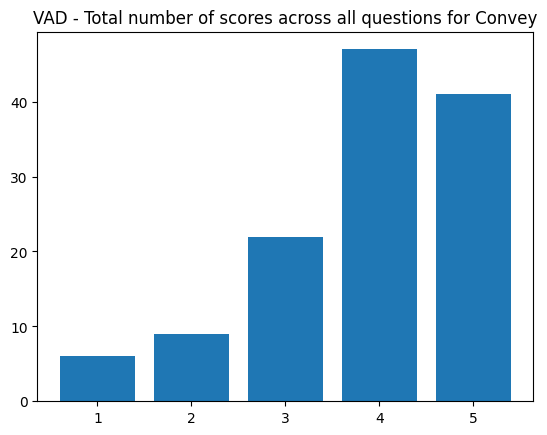

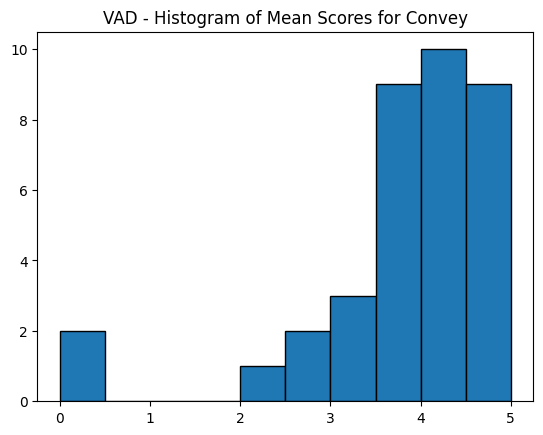

In [25]:
all_vad_convey_scores = vad_convey_dataframe["Scores_Given"].apply(pd.Series).sum()

all_vad_convey_scores = all_vad_convey_scores.reindex([1, 2, 3, 4, 5])

all_vad_convey_scores
plt.bar(all_vad_convey_scores.index, all_vad_convey_scores.values)
plt.title("VAD - Total number of scores across all questions for Convey")
plt.show()

plt.hist(vad_convey_dataframe["Mean_Score"], bins=10, range=(0, 5), edgecolor='black')
plt.title('VAD - Histogram of Mean Scores for Convey')
plt.show()

In [26]:
vad_idsay_data = {
    "Question_Num": [],
    "Num_Answers": [],
    "Scores_Given": [],
    "Mean_Score": [],
}

vad_idsay_col_names = [col for col in vad_data.columns if 'VAD_IdSay' in col]

for q_no, col in enumerate(vad_idsay_col_names):
    vad_data_idsay = vad_data[vad_data[col].notna()]
    current_data = vad_data_idsay[col].tolist()

    response_counts = vad_data_idsay[col].value_counts().to_dict()

    vad_idsay_data["Question_Num"].append(q_no+1)
    vad_idsay_data["Num_Answers"].append(len(vad_data_idsay))
    vad_idsay_data["Scores_Given"].append(response_counts)
    if len(vad_data_idsay) == 0: vad_idsay_data["Mean_Score"].append(0)
    else: vad_idsay_data["Mean_Score"].append(sum([score*count for score, count in response_counts.items()])/len(vad_data_idsay))

vad_idsay_dataframe = pd.DataFrame(vad_idsay_data)

print(
    "VAD - Scores for How much I'd say this:"
    "\n\tAverage Number of Responses per question:", vad_idsay_dataframe["Num_Answers"].mean(),
    "\n\tMean Score:", vad_idsay_dataframe["Mean_Score"].mean(),
    "\n\tStandard Dev of Mean Scores:", vad_idsay_dataframe["Mean_Score"].std(),
    "\n\tVariance of Mean Score:", vad_idsay_dataframe["Mean_Score"].var()
)

vad_idsay_dataframe

VAD - Scores for How much I'd say this:
	Average Number of Responses per question: 3.4722222222222223 
	Mean Score: 3.462996031746032 
	Standard Dev of Mean Scores: 1.211536549618921 
	Variance of Mean Score: 1.4678208110625204


,Question_Num,Num_Answers,Scores_Given,Mean_Score
0,1,5,"{4: 2, 5: 2, 1: 1}",3.800000
1,2,2,"{2: 1, 3: 1}",2.500000
2,3,4,"{1: 2, 4: 1, 3: 1}",2.250000
3,4,2,{4: 2},4.000000
4,5,4,"{1: 1, 3: 1, 2: 1, 5: 1}",2.750000
5,6,3,"{3: 1, 2: 1, 5: 1}",3.333333
6,7,1,{5: 1},5.000000
7,8,3,{5: 3},5.000000
8,9,5,"{3: 2, 4: 2, 1: 1}",3.000000
9,10,3,"{4: 2, 3: 1}",3.666667


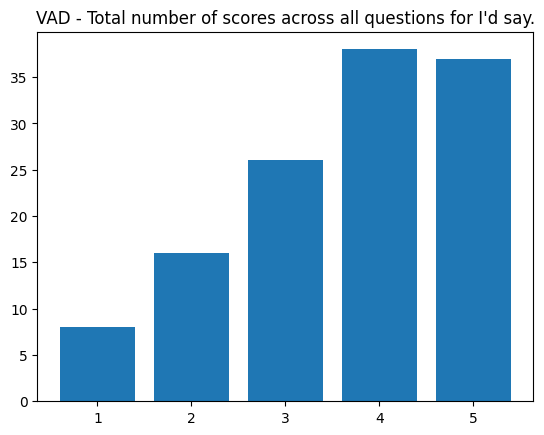

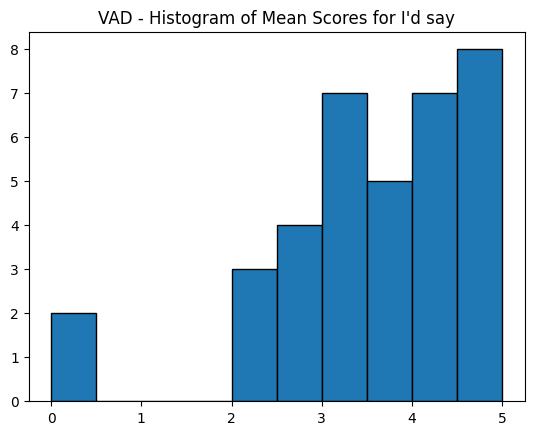

In [27]:
all_vad_idsay_scores = vad_idsay_dataframe["Scores_Given"].apply(pd.Series).sum()

all_vad_idsay_scores = all_vad_idsay_scores.reindex([1, 2, 3, 4, 5])

all_vad_idsay_scores
plt.bar(all_vad_idsay_scores.index, all_vad_idsay_scores.values)
plt.title("VAD - Total number of scores across all questions for I'd say.")
plt.show()

plt.hist(vad_idsay_dataframe["Mean_Score"], bins=10, range=(0, 5), edgecolor='black')
plt.title("VAD - Histogram of Mean Scores for I'd say")
plt.show()

In [28]:
vad_elsesay_data = {
    "Question_Num": [],
    "Num_Answers": [],
    "Scores_Given": [],
    "Mean_Score": [],
}

vad_elsesay_col_names = [col for col in vad_data.columns if 'VAD_ElseSay' in col]

for q_no, col in enumerate(vad_elsesay_col_names):
    vad_data_elsesay = vad_data[vad_data[col].notna()]
    current_data = vad_data_elsesay[col].tolist()

    response_counts = vad_data_elsesay[col].value_counts().to_dict()

    vad_elsesay_data["Question_Num"].append(q_no+1)
    vad_elsesay_data["Num_Answers"].append(len(vad_data_elsesay))
    vad_elsesay_data["Scores_Given"].append(response_counts)
    if len(vad_data_elsesay) == 0: vad_elsesay_data["Mean_Score"].append(0)
    else: vad_elsesay_data["Mean_Score"].append(sum([score*count for score, count in response_counts.items()])/len(vad_data_elsesay))

vad_elsesay_dataframe = pd.DataFrame(vad_elsesay_data)

print(
    "VAD - Scores for How much I'd hear someone else say this:"
    "\n\tAverage Number of Responses per question:", vad_elsesay_dataframe["Num_Answers"].mean(),
    "\n\tMean Score:", vad_elsesay_dataframe["Mean_Score"].mean(),
    "\n\tStandard Dev of Mean Scores:", vad_elsesay_dataframe["Mean_Score"].std(),
    "\n\tVariance of Mean Score:", vad_elsesay_dataframe["Mean_Score"].var()
)

vad_elsesay_dataframe

VAD - Scores for How much I'd hear someone else say this:
	Average Number of Responses per question: 3.4722222222222223 
	Mean Score: 2.8273478835978834 
	Standard Dev of Mean Scores: 1.189722465006346 
	Variance of Mean Score: 1.4154395437407765


,Question_Num,Num_Answers,Scores_Given,Mean_Score
0,1,5,"{4: 3, 1: 1, 5: 1}",3.600000
1,2,2,"{1: 1, 3: 1}",2.000000
2,3,4,"{3: 2, 1: 2}",2.000000
3,4,2,"{1: 1, 3: 1}",2.000000
4,5,4,"{1: 2, 3: 2}",2.000000
5,6,3,"{4: 2, 2: 1}",3.333333
6,7,1,{5: 1},5.000000
7,8,3,"{5: 2, 3: 1}",4.333333
8,9,5,"{3: 2, 4: 1, 5: 1, 1: 1}",3.200000
9,10,3,"{2: 2, 3: 1}",2.333333


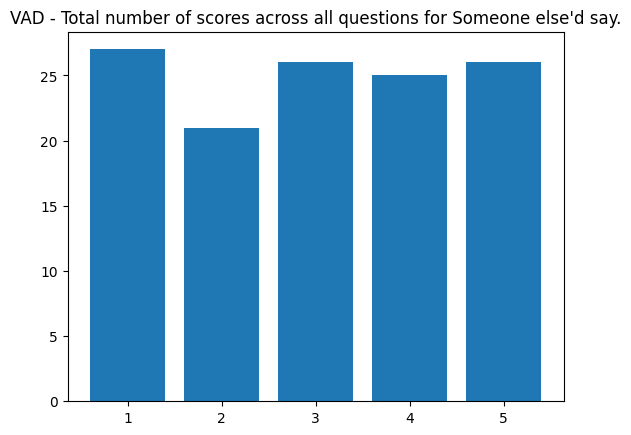

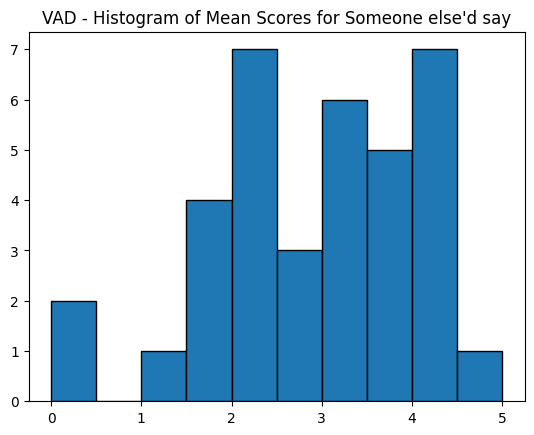

In [29]:
all_vad_elsesay_scores = vad_elsesay_dataframe["Scores_Given"].apply(pd.Series).sum()

all_vad_elsesay_scores = all_vad_elsesay_scores.reindex([1, 2, 3, 4, 5])

all_vad_elsesay_scores
plt.bar(all_vad_elsesay_scores.index, all_vad_elsesay_scores.values)
plt.title("VAD - Total number of scores across all questions for Someone else'd say.")
plt.show()

plt.hist(vad_elsesay_dataframe["Mean_Score"], bins=10, range=(0, 5), edgecolor='black')
plt.title("VAD - Histogram of Mean Scores for Someone else'd say")
plt.show()

## VAD Numeric

In [30]:
vadnum_questions_col_names = [f"VADNum_Question_{n}" for n in range(1, 37)]
vadnum_questions_data = vadnum_data[vadnum_questions_col_names]

vadnum_data_cols = []

for q_no, col in enumerate(vadnum_questions_col_names):
    vadnum_data_qn = vadnum_questions_data[vadnum_questions_data[col].notna()]
    current_data = vadnum_data_qn[col].tolist()
    while len(current_data) < 15:
        current_data.append(np.nan)
    vadnum_data_cols.append(current_data)
    # print(f"{len(vad_data_qn)} people answered VAD Question {q_no}. Each answer was picked this many times:", vad_data_qn[col].value_counts().to_dict())

alpha = krippendorff.alpha(reliability_data=vadnum_data_cols, level_of_measurement='nominal')
print("Kripp's alpha", alpha)

Kripp's alpha 0.02942678745632188


### Per User Likert


In [31]:
vadnum_users_list = vadnum_data["Q07"].tolist()

In [32]:
vadnum_convey_scores, vadnum_idsay_scores, vadnum_elsesay_scores = [], [], []

for user in vadnum_users_list:
    curr_user_data = vadnum_data[vadnum_data['Q07'] == user]    
    curr_user_data_dropped = curr_user_data.dropna(axis=1, how='any', inplace=True)    
    convey_answers = [curr_user_data[col].tolist()[0] for col in curr_user_data.columns if 'Convey' in col]
    idsay_answers = [curr_user_data[col].tolist()[0] for col in curr_user_data.columns if 'IdSay' in col]
    elsesay_answers = [curr_user_data[col].tolist()[0] for col in curr_user_data.columns if 'ElseSay' in col] 
    convey_avg, idsay_avg, elsesay_avg = np.mean(convey_answers), np.mean(idsay_answers), np.mean(elsesay_answers)
    vadnum_convey_scores.append(convey_avg), vadnum_idsay_scores.append(idsay_avg), vadnum_elsesay_scores.append(elsesay_avg)
    print(f"For User: {user},", "Convey Score:", convey_avg, "I'd Say Score", idsay_avg, "Someone Else Say Score", elsesay_avg)

For User: 60883f3787067378cdf11fe1, Convey Score: 3.2 I'd Say Score 2.4 Someone Else Say Score 2.8
For User: 662be2908eae053580d4351b, Convey Score: 3.6 I'd Say Score 4.4 Someone Else Say Score 4.2
For User: 5e1b7ab4f495b43af8ba7829, Convey Score: 3.2 I'd Say Score 2.4 Someone Else Say Score 1.6
For User: 6669c002bf19235ea7aed1cf, Convey Score: 3.75 I'd Say Score 3.75 Someone Else Say Score 3.75
For User: 61584dc0dc74b08c87a31c24, Convey Score: 2.6 I'd Say Score 3.8 Someone Else Say Score 4.2
For User: 6542923cf0793b2a3dc55d69, Convey Score: 2.4 I'd Say Score 3.0 Someone Else Say Score 2.8
For User: 614b2994a6bd480cee7222dd, Convey Score: 3.6 I'd Say Score 2.2 Someone Else Say Score 1.8
For User: 5dac90fbfbeead001454c91f, Convey Score: 3.6 I'd Say Score 4.4 Someone Else Say Score 3.4
For User: 6533e7e2d01f183d0c48caad, Convey Score: 3.2 I'd Say Score 2.8 Someone Else Say Score 2.4
For User: 6038743a95e000257b4fefdd, Convey Score: 3.4 I'd Say Score 3.2 Someone Else Say Score 2.6
For Use

**For each choice question:**
* Number of answers - 8 on average
* Which answers and how many times - See table
* User agreement (krippendorf's something?) - Full agreement on none. Average shannon entropy of 0.70 across the whole set of questions.
* Did answers converge more for later questions vs earlier questions? - They did not. Users did not become more confident as they answered more questions.

In [33]:
vadnum_q_data = {
    "Question_Num": [],
    "Num_Answers": [],
    "Answers_Picked": [],
    "Answers_Normalized": [],
    "Shannon_Entropy": []
}

for q_no, col in enumerate(vadnum_questions_col_names):
    vadnum_data_qn = vadnum_questions_data[vadnum_questions_data[col].notna()]
    current_data = vadnum_data_qn[col].tolist()

    response_counts = vadnum_data_qn[col].value_counts().to_dict()
    proportions = {option: response_counts.get(option, 0) / sum(response_counts.values()) for option in [1, 2, 3, 4]}

    vadnum_q_data["Question_Num"].append(q_no + 1)
    vadnum_q_data["Num_Answers"].append(len(vadnum_data_qn))
    vadnum_q_data["Answers_Picked"].append(response_counts)
    vadnum_q_data["Answers_Normalized"].append(proportions)
    vadnum_q_data["Shannon_Entropy"].append(entropy(list(proportions.values()), base=4))

vadnum_d_dataframe = pd.DataFrame(vadnum_q_data)

print(
    "Number of Answers for VAD Numeric Choice Questions:"
    "\n\tAverage:", vadnum_d_dataframe["Num_Answers"].mean(),
    "\n\tMax:", vadnum_d_dataframe["Num_Answers"].max(),
    "\n\tMin:", vadnum_d_dataframe["Num_Answers"].min(),
    "\n\tMean Entropy:", vadnum_d_dataframe["Shannon_Entropy"].mean()
)

vadnum_d_dataframe

Number of Answers for VAD Numeric Choice Questions:
	Average: 8.277777777777779 
	Max: 15 
	Min: 4 
	Mean Entropy: 0.7074309069492459


,Question_Num,Num_Answers,Answers_Picked,Answers_Normalized,Shannon_Entropy
0,1,10,"{3: 6, 1: 3, 2: 1}","{1: 0.3, 2: 0.1, 3: 0.6, 4: 0.0}",0.647731
1,2,10,"{3: 6, 1: 2, 2: 1, 4: 1}","{1: 0.2, 2: 0.1, 3: 0.6, 4: 0.1}",0.785475
2,3,6,"{1: 3, 4: 2, 3: 1}","{1: 0.5, 2: 0.0, 3: 0.16666666666666666, 4: 0.3333333333333333}",0.729574
3,4,10,"{1: 4, 2: 4, 3: 2}","{1: 0.4, 2: 0.4, 3: 0.2, 4: 0.0}",0.760964
4,5,7,"{3: 2, 4: 2, 2: 2, 1: 1}","{1: 0.14285714285714285, 2: 0.2857142857142857, 3: 0.2857142857142857, 4: 0.2857142857142857}",0.975106
5,6,5,"{3: 3, 4: 1, 1: 1}","{1: 0.2, 2: 0.0, 3: 0.6, 4: 0.2}",0.685475
6,7,11,"{3: 5, 2: 3, 4: 2, 1: 1}","{1: 0.09090909090909091, 2: 0.2727272727272727, 3: 0.45454545454545453, 4: 0.18181818181818182}",0.894965
7,8,5,"{3: 3, 1: 1, 2: 1}","{1: 0.2, 2: 0.2, 3: 0.6, 4: 0.0}",0.685475
8,9,9,"{2: 8, 3: 1}","{1: 0.0, 2: 0.8888888888888888, 3: 0.1111111111111111, 4: 0.0}",0.251629
9,10,6,"{2: 2, 4: 2, 3: 1, 1: 1}","{1: 0.16666666666666666, 2: 0.3333333333333333, 3: 0.16666666666666666, 4: 0.3333333333333333}",0.959148


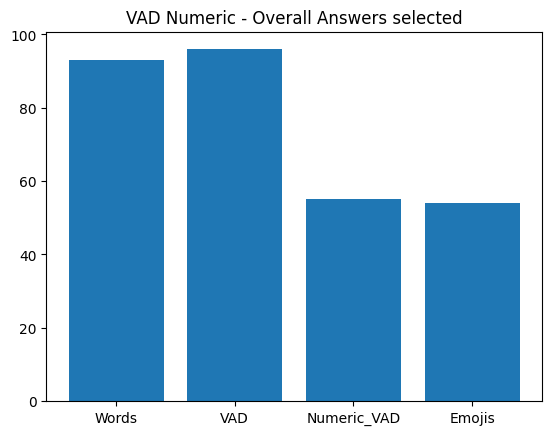

In [34]:
all_vadnum_questions_answers = vadnum_d_dataframe["Answers_Picked"].apply(pd.Series).sum()

all_vadnum_questions_answers.index = all_vadnum_questions_answers.index.astype(str).map(response_representation_map)
all_vadnum_questions_answers = all_vadnum_questions_answers.reindex(list(response_representation_map.values()))

plt.bar(all_vadnum_questions_answers.index, all_vadnum_questions_answers.values)
plt.title("VAD Numeric - Overall Answers selected")
plt.show()

In [35]:
vadnum_convey_data = {
    "Question_Num": [],
    "Num_Answers": [],
    "Scores_Given": [],
    "Mean_Score": [],
}

vadnum_convey_col_names = [col for col in words_data.columns if 'VADNum_Convey' in col]

for q_no, col in enumerate(vadnum_convey_col_names):
    vadnum_data_convey = vadnum_data[vadnum_data[col].notna()]
    current_data = vadnum_data_convey[col].tolist()

    response_counts = vadnum_data_convey[col].value_counts().to_dict()

    vadnum_convey_data["Question_Num"].append(q_no + 1)
    vadnum_convey_data["Num_Answers"].append(len(vadnum_data_convey))
    vadnum_convey_data["Scores_Given"].append(response_counts)
    if len(vadnum_data_convey) == 0:
        vadnum_convey_data["Mean_Score"].append(0)
    else:
        vadnum_convey_data["Mean_Score"].append(
            sum([score * count for score, count in response_counts.items()]) / len(vadnum_data_convey))

vadnum_convey_dataframe = pd.DataFrame(vadnum_convey_data)

print(
    "VAD Numeric - Scores for How well this Conveys:"
    "\n\tAverage Number of Responses per question:", vadnum_convey_dataframe["Num_Answers"].mean(),
    "\n\tMean Score:", vadnum_convey_dataframe["Mean_Score"].mean(),
    "\n\tStandard Dev of Mean Scores:", vadnum_convey_dataframe["Mean_Score"].std(),
    "\n\tVariance of Mean Score:", vadnum_convey_dataframe["Mean_Score"].var()
)

# vadnum_convey_dataframe

VAD Numeric - Scores for How well this Conveys:
	Average Number of Responses per question: 3.7777777777777777 
	Mean Score: 3.4906084656084655 
	Standard Dev of Mean Scores: 0.8802706857675758 
	Variance of Mean Score: 0.7748764802217183


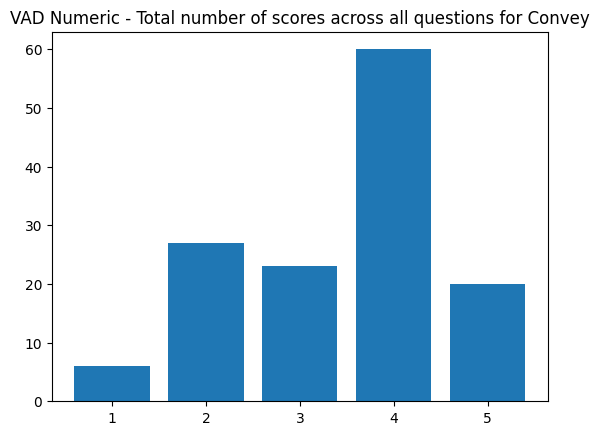

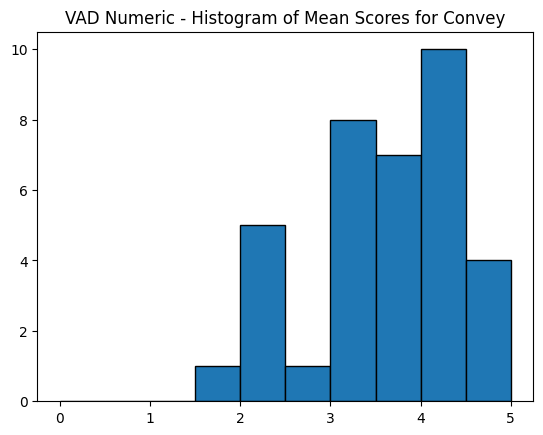

In [36]:
all_vadnum_convey_scores = vadnum_convey_dataframe["Scores_Given"].apply(pd.Series).sum()

all_vadnum_convey_scores = all_vadnum_convey_scores.reindex([1, 2, 3, 4, 5])

all_vadnum_convey_scores
plt.bar(all_vadnum_convey_scores.index, all_vadnum_convey_scores.values)
plt.title("VAD Numeric - Total number of scores across all questions for Convey")
plt.show()

plt.hist(vadnum_convey_dataframe["Mean_Score"], bins=10, range=(0, 5), edgecolor='black')
plt.title('VAD Numeric - Histogram of Mean Scores for Convey')
plt.show()

In [37]:
vadnum_idsay_data = {
    "Question_Num": [],
    "Num_Answers": [],
    "Scores_Given": [],
    "Mean_Score": [],
}

vadnum_idsay_col_names = [col for col in vad_data.columns if 'VADNum_IdSay' in col]

for q_no, col in enumerate(vadnum_idsay_col_names):
    vadnum_data_idsay = vadnum_data[vadnum_data[col].notna()]
    current_data = vadnum_data_idsay[col].tolist()

    response_counts = vadnum_data_idsay[col].value_counts().to_dict()

    vadnum_idsay_data["Question_Num"].append(q_no + 1)
    vadnum_idsay_data["Num_Answers"].append(len(vadnum_data_idsay))
    vadnum_idsay_data["Scores_Given"].append(response_counts)
    if len(vadnum_data_idsay) == 0:
        vadnum_idsay_data["Mean_Score"].append(0)
    else:
        vadnum_idsay_data["Mean_Score"].append(
            sum([score * count for score, count in response_counts.items()]) / len(vadnum_data_idsay))

vadnum_idsay_dataframe = pd.DataFrame(vadnum_idsay_data)

print(
    "VAD Numeric - Scores for How much I'd say this:"
    "\n\tAverage Number of Responses per question:", vadnum_idsay_dataframe["Num_Answers"].mean(),
    "\n\tMean Score:", vadnum_idsay_dataframe["Mean_Score"].mean(),
    "\n\tStandard Dev of Mean Scores:", vadnum_idsay_dataframe["Mean_Score"].std(),
    "\n\tVariance of Mean Score:", vadnum_idsay_dataframe["Mean_Score"].var()
)

vadnum_idsay_dataframe

VAD Numeric - Scores for How much I'd say this:
	Average Number of Responses per question: 3.7777777777777777 
	Mean Score: 3.286309523809524 
	Standard Dev of Mean Scores: 0.689244180013542 
	Variance of Mean Score: 0.4750575396825399


,Question_Num,Num_Answers,Scores_Given,Mean_Score
0,1,8,"{4: 4, 2: 2, 3: 1, 5: 1}",3.500000
1,2,5,"{4: 2, 5: 1, 1: 1, 3: 1}",3.400000
2,3,4,"{3: 2, 4: 2}",3.500000
3,4,4,"{4: 2, 3: 1, 5: 1}",4.000000
4,5,8,"{4: 4, 5: 2, 2: 1, 3: 1}",3.875000
5,6,3,"{5: 1, 4: 1, 2: 1}",3.666667
6,7,3,"{4: 1, 2: 1, 3: 1}",3.000000
7,8,2,"{3: 1, 2: 1}",2.500000
8,9,1,{4: 1},4.000000
9,10,4,"{1: 1, 4: 1, 2: 1, 3: 1}",2.500000


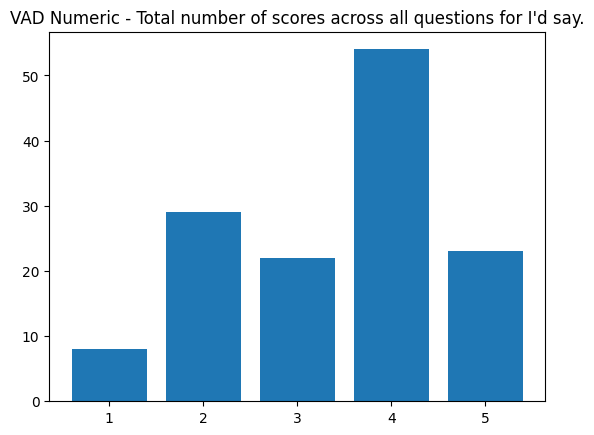

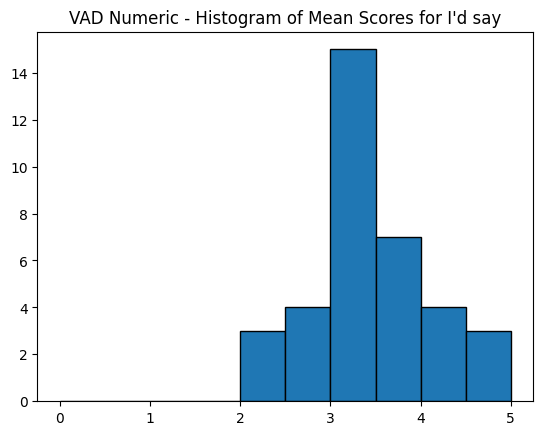

In [38]:
all_vadnum_idsay_scores = vadnum_idsay_dataframe["Scores_Given"].apply(pd.Series).sum()

all_vadnum_idsay_scores = all_vadnum_idsay_scores.reindex([1, 2, 3, 4, 5])

all_vadnum_idsay_scores
plt.bar(all_vadnum_idsay_scores.index, all_vadnum_idsay_scores.values)
plt.title("VAD Numeric - Total number of scores across all questions for I'd say.")
plt.show()

plt.hist(vadnum_idsay_dataframe["Mean_Score"], bins=10, range=(0, 5), edgecolor='black')
plt.title("VAD Numeric - Histogram of Mean Scores for I'd say")
plt.show()

In [39]:
vadnum_elsesay_data = {
    "Question_Num": [],
    "Num_Answers": [],
    "Scores_Given": [],
    "Mean_Score": [],
}

vadnum_elsesay_col_names = [col for col in vadnum_data.columns if 'VADNum_ElseSay' in col]

for q_no, col in enumerate(vadnum_elsesay_col_names):
    vadnum_data_elsesay = vadnum_data[vadnum_data[col].notna()]
    current_data = vadnum_data_elsesay[col].tolist()

    response_counts = vadnum_data_elsesay[col].value_counts().to_dict()

    vadnum_elsesay_data["Question_Num"].append(q_no + 1)
    vadnum_elsesay_data["Num_Answers"].append(len(vadnum_data_elsesay))
    vadnum_elsesay_data["Scores_Given"].append(response_counts)
    if len(vadnum_data_elsesay) == 0:
        vadnum_elsesay_data["Mean_Score"].append(0)
    else:
        vadnum_elsesay_data["Mean_Score"].append(
            sum([score * count for score, count in response_counts.items()]) / len(vadnum_data_elsesay))

vadnum_elsesay_dataframe = pd.DataFrame(vadnum_elsesay_data)

print(
    "VAD Num - Scores for How much I'd hear someone else say this:"
    "\n\tAverage Number of Responses per question:", vadnum_elsesay_dataframe["Num_Answers"].mean(),
    "\n\tMean Score:", vadnum_elsesay_dataframe["Mean_Score"].mean(),
    "\n\tStandard Dev of Mean Scores:", vadnum_elsesay_dataframe["Mean_Score"].std(),
    "\n\tVariance of Mean Score:", vadnum_elsesay_dataframe["Mean_Score"].var()
)

vadnum_elsesay_dataframe

VAD Num - Scores for How much I'd hear someone else say this:
	Average Number of Responses per question: 3.7777777777777777 
	Mean Score: 2.768981481481481 
	Standard Dev of Mean Scores: 0.9139887531677332 
	Variance of Mean Score: 0.8353754409171076


,Question_Num,Num_Answers,Scores_Given,Mean_Score
0,1,8,"{4: 3, 1: 2, 2: 2, 3: 1}",2.625000
1,2,5,"{4: 2, 2: 2, 1: 1}",2.600000
2,3,4,"{2: 3, 3: 1}",2.250000
3,4,4,"{5: 2, 3: 1, 4: 1}",4.250000
4,5,8,"{4: 3, 5: 3, 2: 2}",3.875000
5,6,3,"{5: 1, 4: 1, 1: 1}",3.333333
6,7,3,"{5: 1, 1: 1, 3: 1}",3.000000
7,8,2,"{2: 1, 5: 1}",3.500000
8,9,1,{5: 1},5.000000
9,10,4,"{2: 2, 1: 1, 4: 1}",2.250000


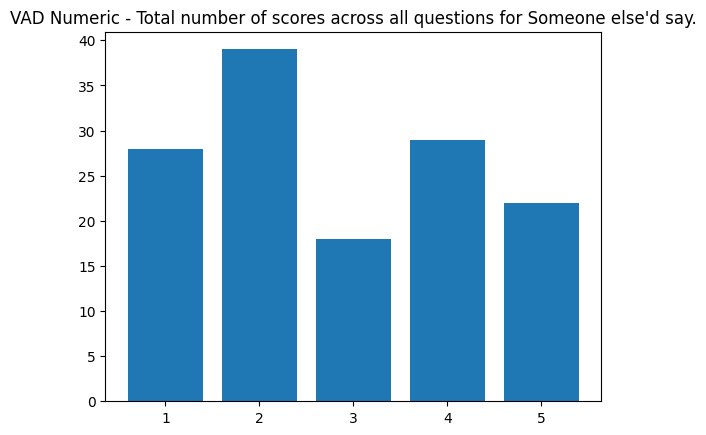

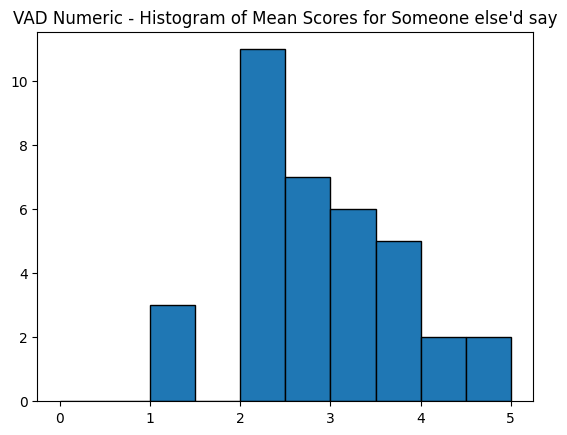

In [40]:
all_vadnum_elsesay_scores = vadnum_elsesay_dataframe["Scores_Given"].apply(pd.Series).sum()

all_vadnum_elsesay_scores = all_vadnum_elsesay_scores.reindex([1, 2, 3, 4, 5])

all_vadnum_elsesay_scores
plt.bar(all_vadnum_elsesay_scores.index, all_vadnum_elsesay_scores.values)
plt.title("VAD Numeric - Total number of scores across all questions for Someone else'd say.")
plt.show()

plt.hist(vadnum_elsesay_dataframe["Mean_Score"], bins=10, range=(0, 5), edgecolor='black')
plt.title("VAD Numeric - Histogram of Mean Scores for Someone else'd say")
plt.show()

## Emojis

In [41]:
emojis_questions_col_names = [f"Emojis_Question_{n}" for n in range(1, 37)]
emojis_questions_data = emojis_data[emojis_questions_col_names]

emojis_data_cols = []

for q_no, col in enumerate(emojis_questions_col_names):
    emojis_data_qn = emojis_questions_data[emojis_questions_data[col].notna()]
    current_data = emojis_data_qn[col].tolist()
    while len(current_data) < 9:
        current_data.append("")
    emojis_data_cols.append(current_data)
    # print(f"{len(vad_data_qn)} people answered VAD Question {q_no}. Each answer was picked this many times:", vad_data_qn[col].value_counts().to_dict())

alpha = krippendorff.alpha(reliability_data=emojis_data_cols, level_of_measurement='nominal')
print("Kripp's alpha", alpha)

Kripp's alpha 0.07546145919869907


### Per User Likert

In [42]:
emojis_users_list = emojis_data["Q07"].tolist()

In [43]:
emojis_convey_scores, emojis_idsay_scores, emojis_elsesay_scores = [], [], []

for user in emojis_users_list:
    curr_user_data = emojis_data[emojis_data['Q07'] == user]    
    curr_user_data_dropped = curr_user_data.dropna(axis=1, how='any', inplace=True)    
    convey_answers = [curr_user_data[col].tolist()[0] for col in curr_user_data.columns if 'Convey' in col]
    idsay_answers = [curr_user_data[col].tolist()[0] for col in curr_user_data.columns if 'IdSay' in col]
    elsesay_answers = [curr_user_data[col].tolist()[0] for col in curr_user_data.columns if 'ElseSay' in col] 
    convey_avg, idsay_avg, elsesay_avg = np.mean(convey_answers), np.mean(idsay_answers), np.mean(elsesay_answers)
    emojis_convey_scores.append(convey_avg), emojis_idsay_scores.append(idsay_avg), emojis_elsesay_scores.append(elsesay_avg)
    print(f"For User: {user},", "Convey Score:", convey_avg, "I'd Say Score", idsay_avg, "Someone Else Say Score", elsesay_avg)

For User: 65cb6def4a0c1fc9b24bc884, Convey Score: 4.2 I'd Say Score 2.4 Someone Else Say Score 1.8
For User: 60aa30669b1bc58945396e74, Convey Score: 4.6 I'd Say Score 2.2 Someone Else Say Score 2.2
For User: 664cffed96a0caaf5e149f2f, Convey Score: 4.0 I'd Say Score 3.0 Someone Else Say Score 2.6
For User: 60db3eeb564183360082d3a7, Convey Score: 3.2 I'd Say Score 1.8 Someone Else Say Score 1.2
For User: 58a130dcbb9e0f0001ac9ae2, Convey Score: 4.4 I'd Say Score 2.4 Someone Else Say Score 2.0
For User: 55ddb84550a1f7000b90d65a, Convey Score: 4.0 I'd Say Score 3.2 Someone Else Say Score 2.8
For User: 5bd612ce860b840001dc1a74, Convey Score: 4.6 I'd Say Score 4.0 Someone Else Say Score 2.8
For User: 672aa689c03c5957fdf0bfe9, Convey Score: 4.0 I'd Say Score 3.8 Someone Else Say Score 3.8
For User: 5a68c8ec63394a000155cbb9, Convey Score: 3.6 I'd Say Score 2.6 Someone Else Say Score 1.0
For User: 60abca98eca58f378b17dc20, Convey Score: 4.2 I'd Say Score 3.6 Someone Else Say Score 3.0
For User: 

**For each choice question:**
* Number of answers - 8 on average
* Which answers and how many times - See table
* User agreement (krippendorf's something?) - Full agreement on 11. Average shannon entropy of 0.67 across the whole set of questions.
* Did answers converge more for later questions vs earlier questions? - They did not. Users did not become more confident as they answered more questions.

In [44]:
emojis_q_data = {
    "Question_Num": [],
    "Num_Answers": [],
    "Answers_Picked": [],
    "Answers_Normalized": [],
    "Shannon_Entropy": []
}

for q_no, col in enumerate(emojis_questions_col_names):
    emojis_data_qn = emojis_questions_data[emojis_questions_data[col].notna()]
    current_data = emojis_data_qn[col].tolist()

    response_counts = emojis_data_qn[col].value_counts().to_dict()
    proportions = {option: response_counts.get(option, 0)/sum(response_counts.values()) for option in [1, 2, 3, 4]}

    emojis_q_data["Question_Num"].append(q_no+1)
    emojis_q_data["Num_Answers"].append(len(emojis_data_qn))
    emojis_q_data["Answers_Picked"].append(response_counts)
    emojis_q_data["Answers_Normalized"].append(proportions)
    emojis_q_data["Shannon_Entropy"].append(entropy(list(proportions.values()), base=4))

emojis_d_dataframe = pd.DataFrame(emojis_q_data)

print(
    "Emojis - Number of Answers for Choice Questions:"
    "\n\tAverage:", emojis_d_dataframe["Num_Answers"].mean(),
    "\n\tMax:", emojis_d_dataframe["Num_Answers"].max(),
    "\n\tMin:", emojis_d_dataframe["Num_Answers"].min(),
    "\n\tMean Entropy:", emojis_d_dataframe["Shannon_Entropy"].mean()
)

emojis_d_dataframe

Emojis - Number of Answers for Choice Questions:
	Average: 8.055555555555555 
	Max: 9 
	Min: 7 
	Mean Entropy: 0.6706101903248579


,Question_Num,Num_Answers,Answers_Picked,Answers_Normalized,Shannon_Entropy
0,1,7,"{2: 3, 3: 3, 1: 1}","{1: 0.14285714285714285, 2: 0.42857142857142855, 3: 0.42857142857142855, 4: 0.0}",0.724408
1,2,8,"{2: 4, 4: 2, 3: 2}","{1: 0.0, 2: 0.5, 3: 0.25, 4: 0.25}",0.750000
2,3,9,"{2: 6, 1: 3}","{1: 0.3333333333333333, 2: 0.6666666666666666, 3: 0.0, 4: 0.0}",0.459148
3,4,8,"{1: 3, 2: 2, 4: 2, 3: 1}","{1: 0.375, 2: 0.25, 3: 0.125, 4: 0.25}",0.952820
4,5,9,"{3: 4, 2: 2, 4: 2, 1: 1}","{1: 0.1111111111111111, 2: 0.2222222222222222, 3: 0.4444444444444444, 4: 0.2222222222222222}",0.918296
5,6,7,"{1: 3, 4: 2, 2: 1, 3: 1}","{1: 0.42857142857142855, 2: 0.14285714285714285, 3: 0.14285714285714285, 4: 0.2857142857142857}",0.921185
6,7,9,"{1: 5, 4: 3, 2: 1}","{1: 0.5555555555555556, 2: 0.1111111111111111, 3: 0.0, 4: 0.3333333333333333}",0.675822
7,8,9,"{1: 5, 4: 3, 3: 1}","{1: 0.5555555555555556, 2: 0.0, 3: 0.1111111111111111, 4: 0.3333333333333333}",0.675822
8,9,7,"{2: 5, 4: 1, 1: 1}","{1: 0.14285714285714285, 2: 0.7142857142857143, 3: 0.0, 4: 0.14285714285714285}",0.574417
9,10,8,"{4: 4, 2: 2, 3: 1, 1: 1}","{1: 0.125, 2: 0.25, 3: 0.125, 4: 0.5}",0.875000


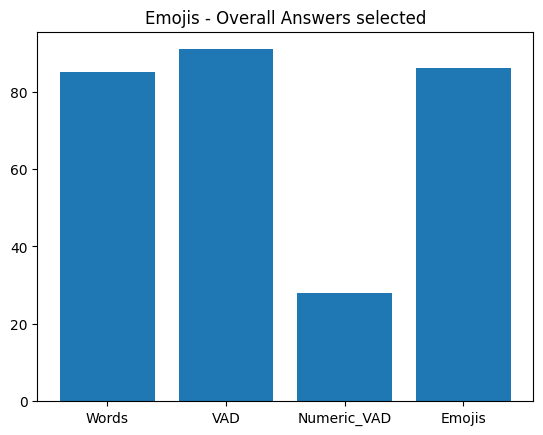

In [45]:
all_emojis_questions_answers = emojis_d_dataframe["Answers_Picked"].apply(pd.Series).sum()

all_emojis_questions_answers.index = all_emojis_questions_answers.index.astype(str).map(response_representation_map)
all_emojis_questions_answers = all_emojis_questions_answers.reindex(list(response_representation_map.values()))

plt.bar(all_emojis_questions_answers.index, all_emojis_questions_answers.values)
plt.title("Emojis - Overall Answers selected")
plt.show()

In [46]:
emojis_convey_data = {
    "Question_Num": [],
    "Num_Answers": [],
    "Scores_Given": [],
    "Mean_Score": [],
}

emojis_convey_col_names = [col for col in emojis_data.columns if 'Emojis_Convey' in col]

for q_no, col in enumerate(emojis_convey_col_names):
    emojis_data_convey = emojis_data[emojis_data[col].notna()]
    current_data = emojis_data_convey[col].tolist()

    response_counts = emojis_data_convey[col].value_counts().to_dict()

    emojis_convey_data["Question_Num"].append(q_no + 1)
    emojis_convey_data["Num_Answers"].append(len(emojis_data_convey))
    emojis_convey_data["Scores_Given"].append(response_counts)
    if len(emojis_data_convey) == 0:
        emojis_convey_data["Mean_Score"].append(0)
    else:
        emojis_convey_data["Mean_Score"].append(
            sum([score * count for score, count in response_counts.items()]) / len(emojis_data_convey))

emojis_convey_dataframe = pd.DataFrame(emojis_convey_data)

print(
    "Emojis - Scores for How well this Conveys:"
    "\n\tAverage Number of Responses per question:", emojis_convey_dataframe["Num_Answers"].mean(),
    "\n\tMean Score:", emojis_convey_dataframe["Mean_Score"].mean(),
    "\n\tStandard Dev of Mean Scores:", emojis_convey_dataframe["Mean_Score"].std(),
    "\n\tVariance of Mean Score:", emojis_convey_dataframe["Mean_Score"].var()
)

Emojis - Scores for How well this Conveys:
	Average Number of Responses per question: 4.027777777777778 
	Mean Score: 3.7881944444444438 
	Standard Dev of Mean Scores: 0.9241434794635087 
	Variance of Mean Score: 0.8540411706349206


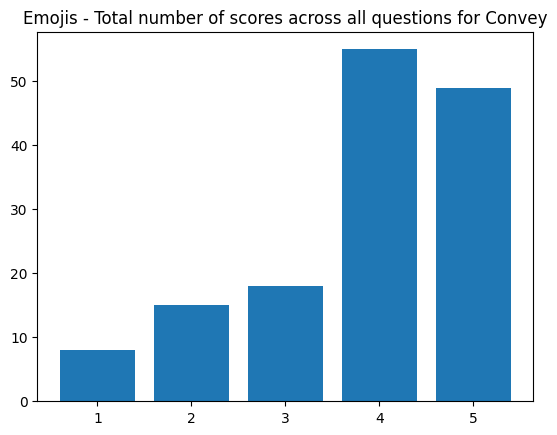

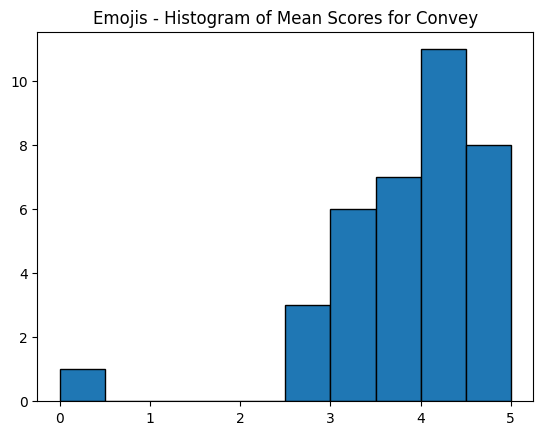

In [47]:
all_emojis_convey_scores = emojis_convey_dataframe["Scores_Given"].apply(pd.Series).sum()

all_emojis_convey_scores = all_emojis_convey_scores.reindex([1, 2, 3, 4, 5])

all_emojis_convey_scores
plt.bar(all_emojis_convey_scores.index, all_emojis_convey_scores.values)
plt.title("Emojis - Total number of scores across all questions for Convey")
plt.show()

plt.hist(emojis_convey_dataframe["Mean_Score"], bins=10, range=(0, 5), edgecolor='black')
plt.title('Emojis - Histogram of Mean Scores for Convey')
plt.show()

In [48]:
emojis_idsay_data = {
    "Question_Num": [],
    "Num_Answers": [],
    "Scores_Given": [],
    "Mean_Score": [],
}

emojis_idsay_col_names = [col for col in emojis_data.columns if 'Emojis_IdSay' in col]

for q_no, col in enumerate(emojis_idsay_col_names):
    emojis_data_idsay = emojis_data[emojis_data[col].notna()]
    current_data = emojis_data_idsay[col].tolist()

    response_counts = emojis_data_idsay[col].value_counts().to_dict()

    emojis_idsay_data["Question_Num"].append(q_no + 1)
    emojis_idsay_data["Num_Answers"].append(len(emojis_data_idsay))
    emojis_idsay_data["Scores_Given"].append(response_counts)
    if len(emojis_data_idsay) == 0:
        emojis_idsay_data["Mean_Score"].append(0)
    else:
        emojis_idsay_data["Mean_Score"].append(
            sum([score * count for score, count in response_counts.items()]) / len(emojis_data_idsay))

emojis_idsay_dataframe = pd.DataFrame(emojis_idsay_data)

print(
    "Emojis - Scores for How much I'd say this:"
    "\n\tAverage Number of Responses per question:", emojis_idsay_dataframe["Num_Answers"].mean(),
    "\n\tMean Score:", emojis_idsay_dataframe["Mean_Score"].mean(),
    "\n\tStandard Dev of Mean Scores:", emojis_idsay_dataframe["Mean_Score"].std(),
    "\n\tVariance of Mean Score:", emojis_idsay_dataframe["Mean_Score"].var()
)

# emojis_idsay_dataframe

Emojis - Scores for How much I'd say this:
	Average Number of Responses per question: 4.027777777777778 
	Mean Score: 3.174074074074074 
	Standard Dev of Mean Scores: 1.0434390213048665 
	Variance of Mean Score: 1.088764991181658


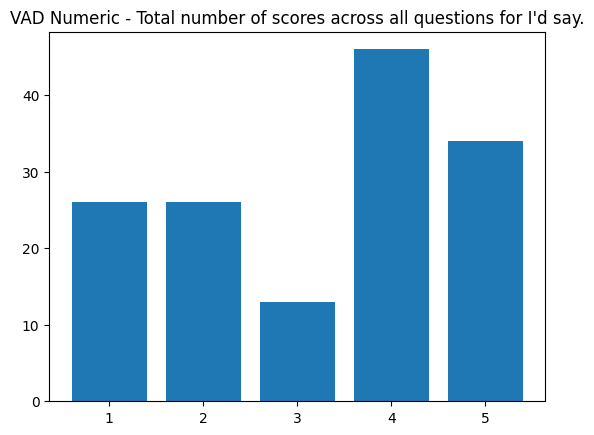

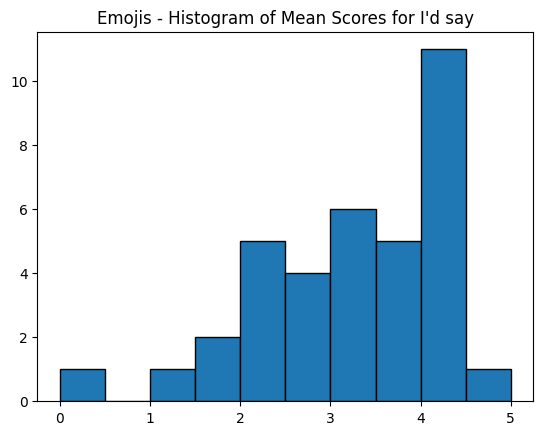

In [49]:
all_emojis_idsay_scores = emojis_idsay_dataframe["Scores_Given"].apply(pd.Series).sum()

all_emojis_idsay_scores = all_emojis_idsay_scores.reindex([1, 2, 3, 4, 5])

all_emojis_idsay_scores
plt.bar(all_emojis_idsay_scores.index, all_emojis_idsay_scores.values)
plt.title("VAD Numeric - Total number of scores across all questions for I'd say.")
plt.show()

plt.hist(emojis_idsay_dataframe["Mean_Score"], bins=10, range=(0, 5), edgecolor='black')
plt.title("Emojis - Histogram of Mean Scores for I'd say")
plt.show()

In [50]:
emojis_elsesay_data = {
    "Question_Num": [],
    "Num_Answers": [],
    "Scores_Given": [],
    "Mean_Score": [],
}

emojis_elsesay_col_names = [col for col in emojis_data.columns if 'Emojis_ElseSay' in col]

for q_no, col in enumerate(emojis_elsesay_col_names):
    emojis_data_elsesay = emojis_data[emojis_data[col].notna()]
    current_data = emojis_data_elsesay[col].tolist()

    response_counts = emojis_data_elsesay[col].value_counts().to_dict()

    emojis_elsesay_data["Question_Num"].append(q_no + 1)
    emojis_elsesay_data["Num_Answers"].append(len(emojis_data_elsesay))
    emojis_elsesay_data["Scores_Given"].append(response_counts)
    if len(emojis_data_elsesay) == 0:
        emojis_elsesay_data["Mean_Score"].append(0)
    else:
        emojis_elsesay_data["Mean_Score"].append(
            sum([score * count for score, count in response_counts.items()]) / len(emojis_data_elsesay))

emojis_elsesay_dataframe = pd.DataFrame(emojis_elsesay_data)

print(
    "Emojis - Scores for How much I'd hear someone else say this:"
    "\n\tAverage Number of Responses per question:", emojis_elsesay_dataframe["Num_Answers"].mean(),
    "\n\tMean Score:", emojis_elsesay_dataframe["Mean_Score"].mean(),
    "\n\tStandard Dev of Mean Scores:", emojis_elsesay_dataframe["Mean_Score"].std(),
    "\n\tVariance of Mean Score:", emojis_elsesay_dataframe["Mean_Score"].var()
)

# emojis_elsesay_dataframe

Emojis - Scores for How much I'd hear someone else say this:
	Average Number of Responses per question: 4.027777777777778 
	Mean Score: 2.466898148148148 
	Standard Dev of Mean Scores: 0.9331983025431886 
	Variance of Mean Score: 0.8708590718694885


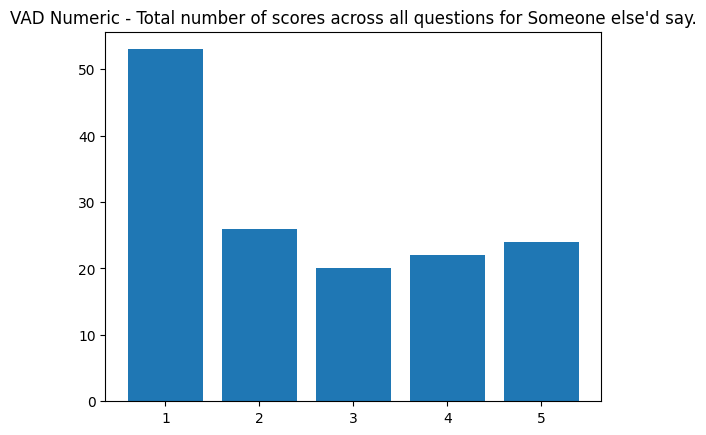

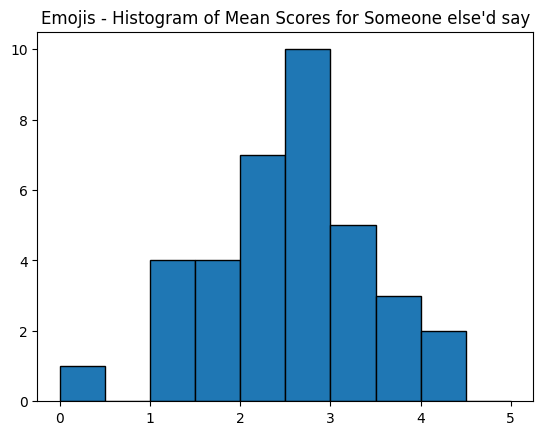

In [51]:
all_emojis_elsesay_scores = emojis_elsesay_dataframe["Scores_Given"].apply(pd.Series).sum()

all_emojis_elsesay_scores = all_emojis_elsesay_scores.reindex([1, 2, 3, 4, 5])

all_emojis_elsesay_scores
plt.bar(all_emojis_elsesay_scores.index, all_emojis_elsesay_scores.values)
plt.title("VAD Numeric - Total number of scores across all questions for Someone else'd say.")
plt.show()

plt.hist(emojis_elsesay_dataframe["Mean_Score"], bins=10, range=(0, 5), edgecolor='black')
plt.title("Emojis - Histogram of Mean Scores for Someone else'd say")
plt.show()

# Per Emotion

In [52]:
list_of_emotions = list([em[0] for em in list(emotions_map.values())])[:18]
columns_per_emo = {}
per_emo_data = {}
per_emo_stats = {}

per_emo_dataset = dataset.drop(columns=["VAD_Train_1", "VAD_Train_2", "VAD_Train_3", "37_Q402_1", "37_Q402_2", "37_Q402_3"])[:-1]

for nm, em in enumerate(list_of_emotions, start=1):
    columns_per_emo[em] = [col for col in per_emo_dataset.columns if col.endswith(f"_{nm*2-1}") or col.endswith(f"_{nm*2}")]
    # print("Current Emotion:", em)

    curr_emo_data = {}
    curr_emo_stats = {}
    questions_cols = [col for col in columns_per_emo[em] if 'Question' in col]
    convey_cols = [col for col in columns_per_emo[em] if 'Convey' in col]
    idsay_cols = [col for col in columns_per_emo[em] if 'IdSay' in col]
    elsesay_cols = [col for col in columns_per_emo[em] if 'ElseSay' in col]

    curr_emo_data["response_counts"] = per_emo_dataset[questions_cols].stack().value_counts().sort_index().to_dict()
    curr_emo_data["convey_scores"] = per_emo_dataset[convey_cols].stack().value_counts().sort_index().to_dict()
    curr_emo_data["idsay_scores"] = per_emo_dataset[idsay_cols].stack().value_counts().sort_index().to_dict()
    curr_emo_data["elsesay_scores"] = per_emo_dataset[elsesay_cols].stack().value_counts().sort_index().to_dict()

    curr_emo_stats["shannon_entropy"] = entropy([val/sum(curr_emo_data["response_counts"].values()) for val in curr_emo_data["response_counts"].values()], base=4)
    curr_emo_stats["mean_convey_score"] = sum(key*val for key, val in curr_emo_data["convey_scores"].items())/sum(curr_emo_data["convey_scores"].values())
    curr_emo_stats["mean_idsay_score"] = sum(key*val for key, val in curr_emo_data["convey_scores"].items())/sum(curr_emo_data["convey_scores"].values())
    curr_emo_stats["mean_elsesay_score"] = sum(key*val for key, val in curr_emo_data["convey_scores"].items())/sum(curr_emo_data["convey_scores"].values())

    per_emo_data[em] = curr_emo_data
    per_emo_stats[em] = curr_emo_stats



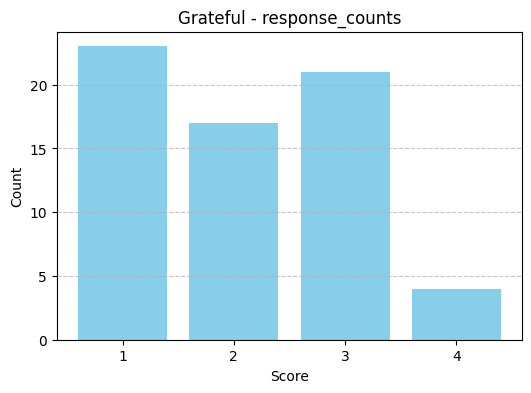

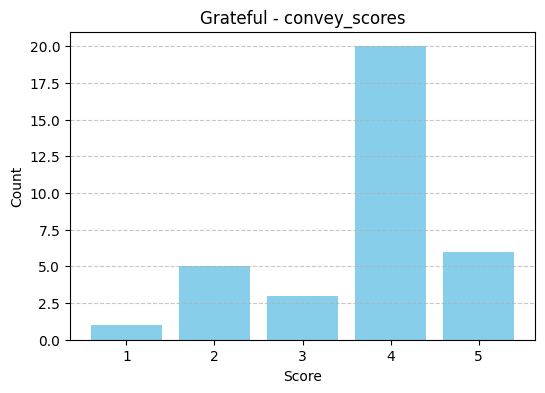

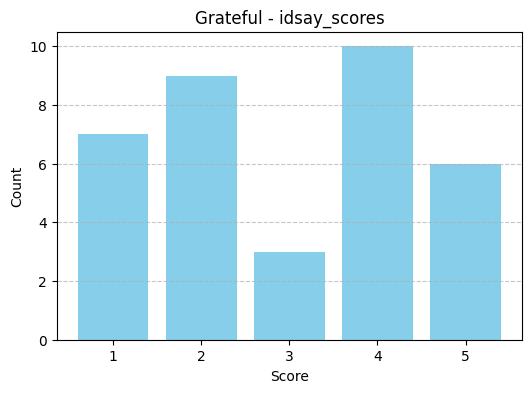

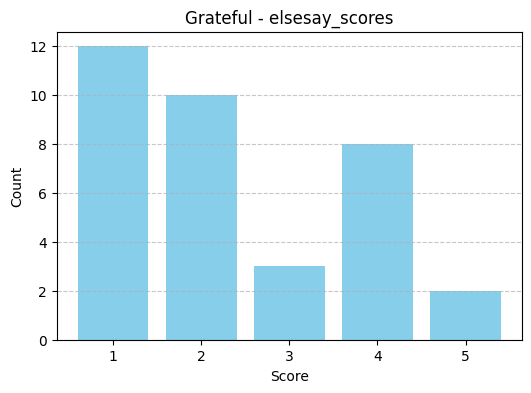

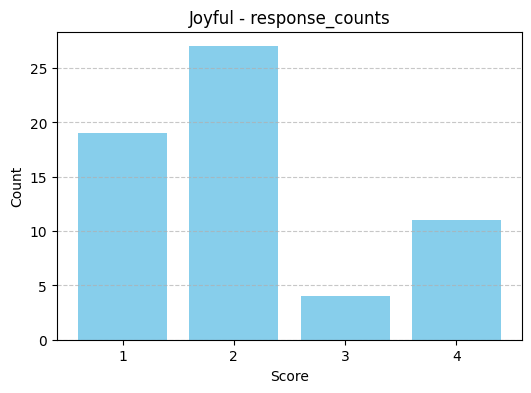

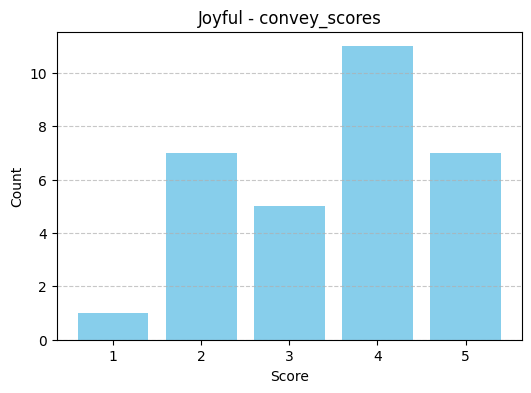

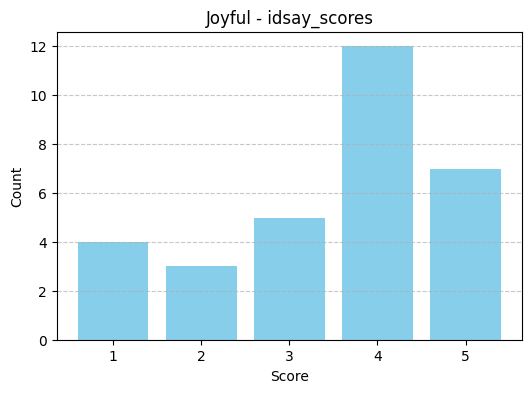

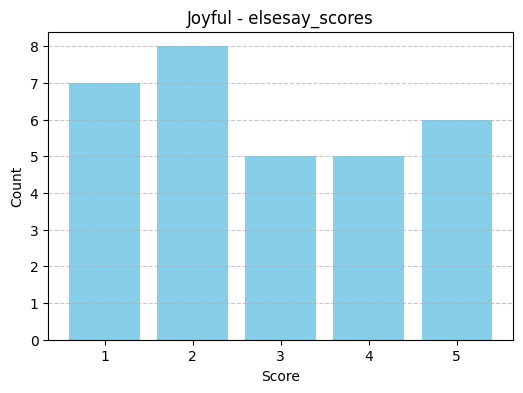

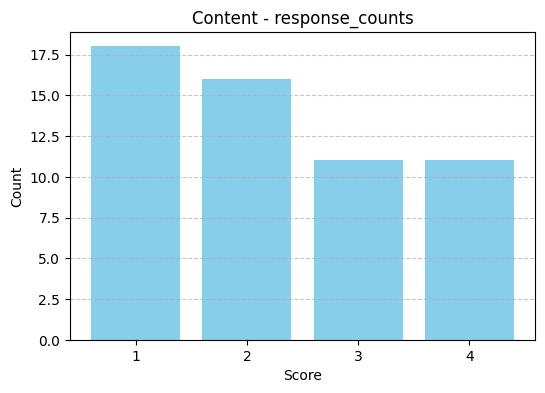

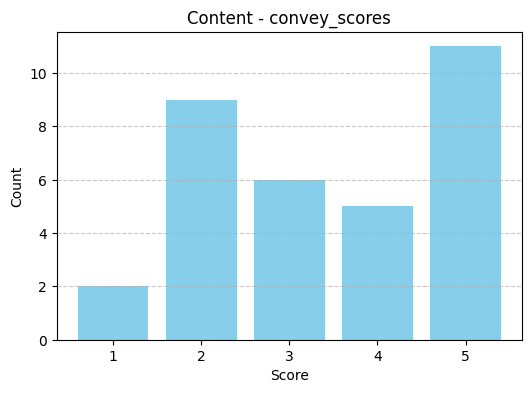

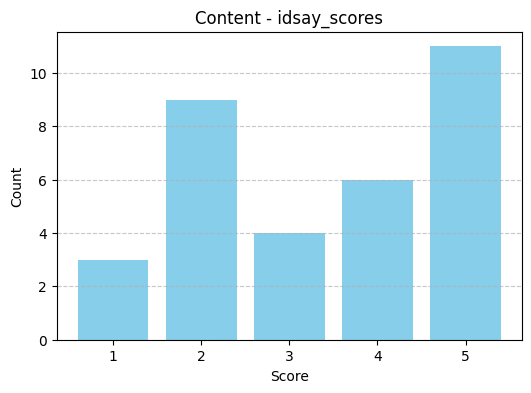

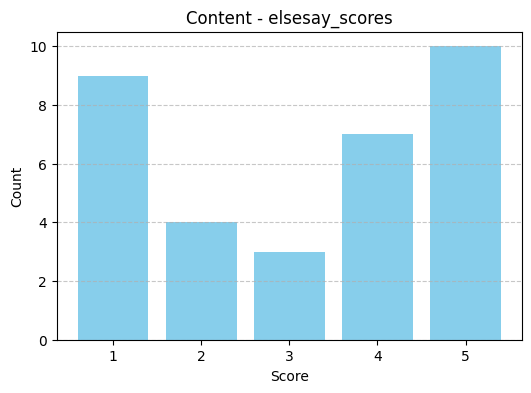

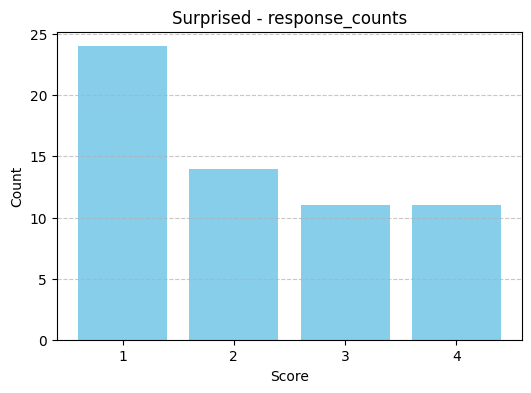

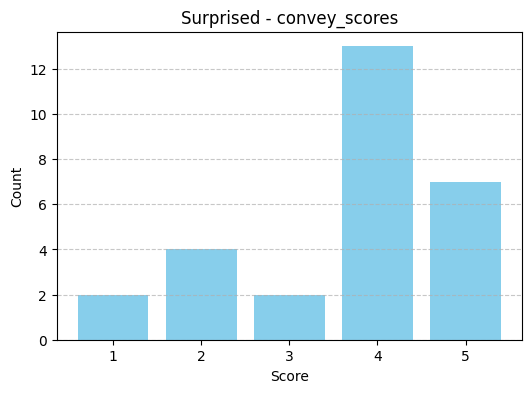

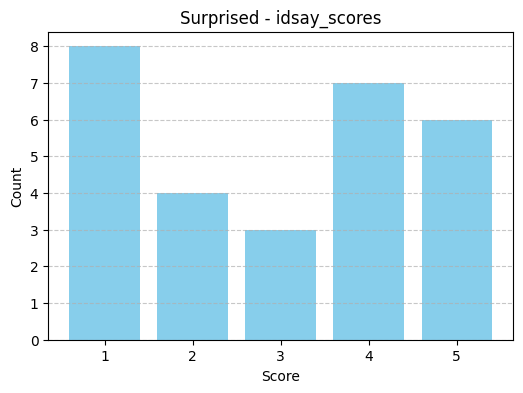

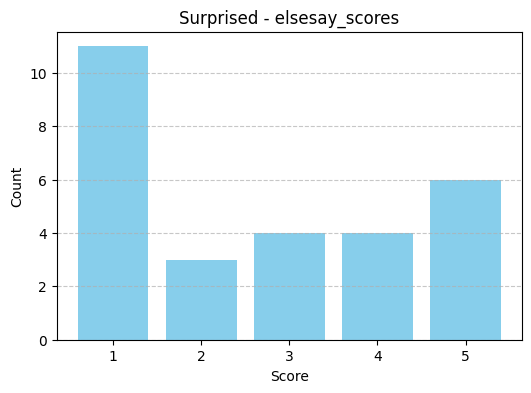

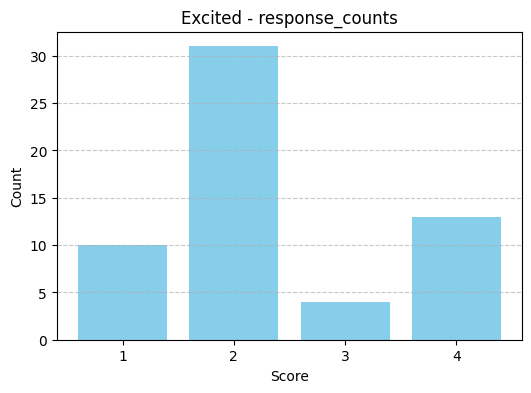

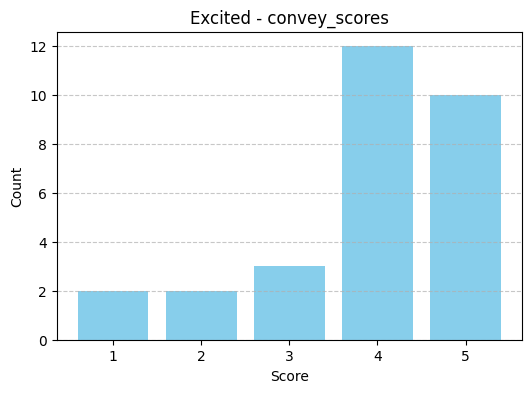

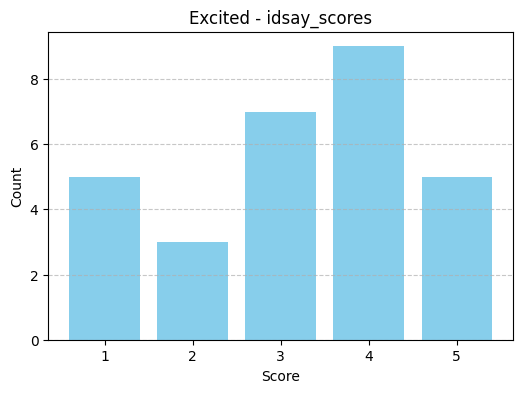

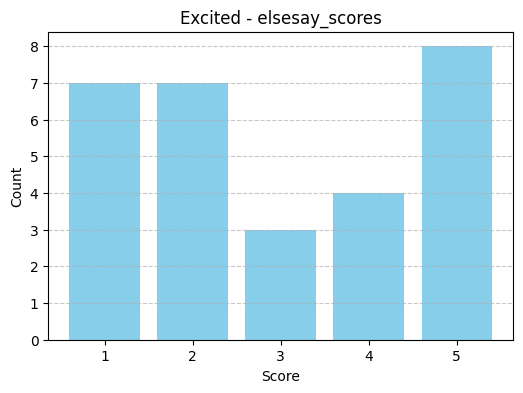

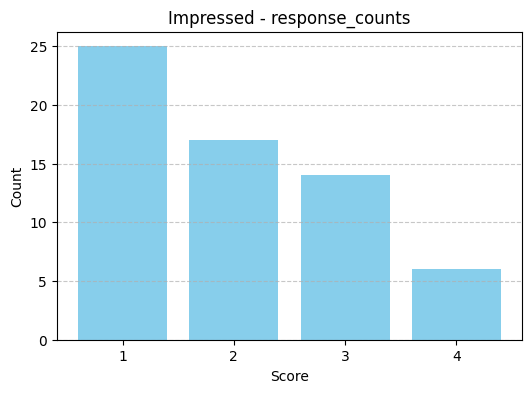

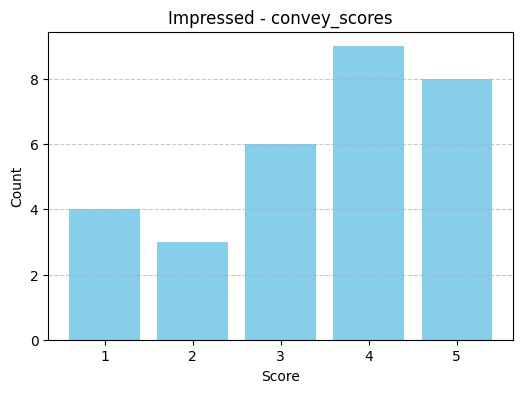

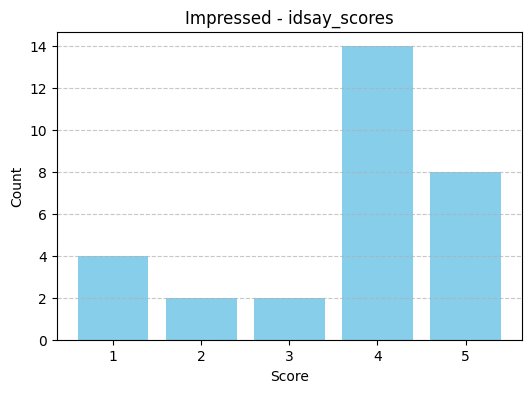

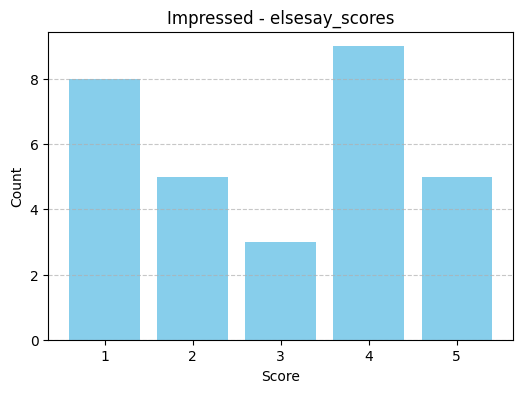

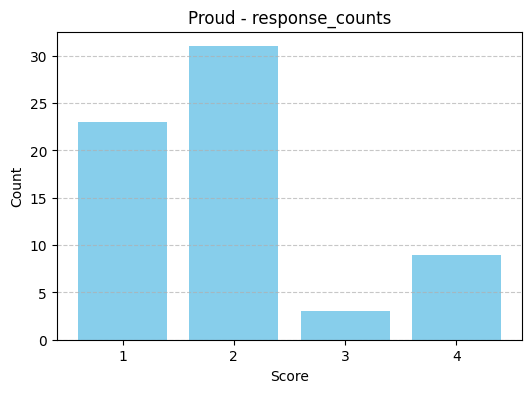

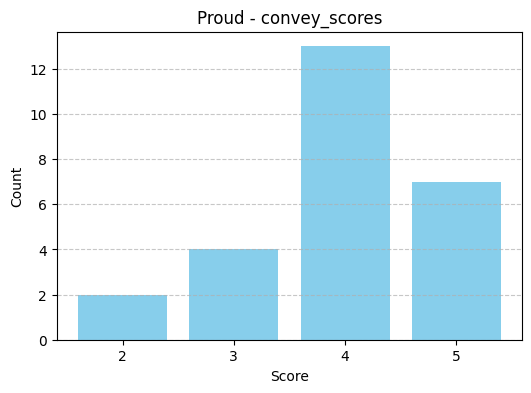

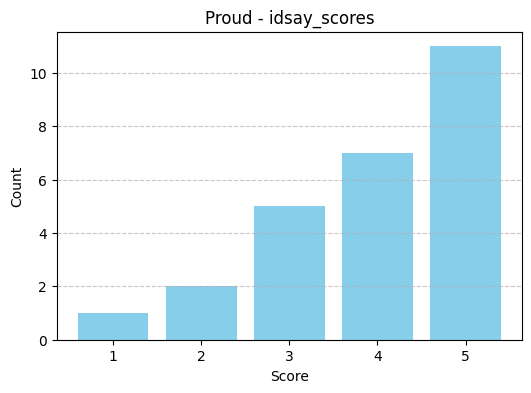

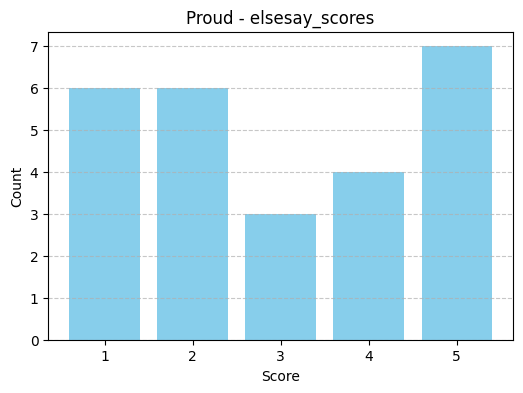

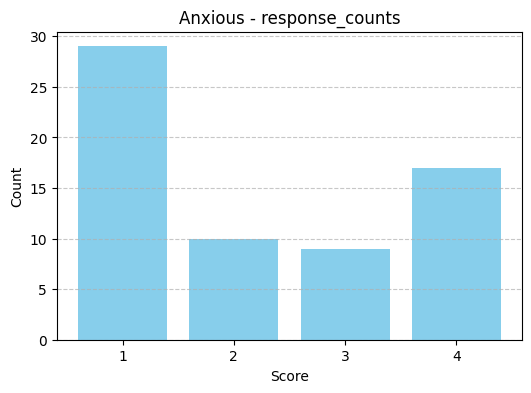

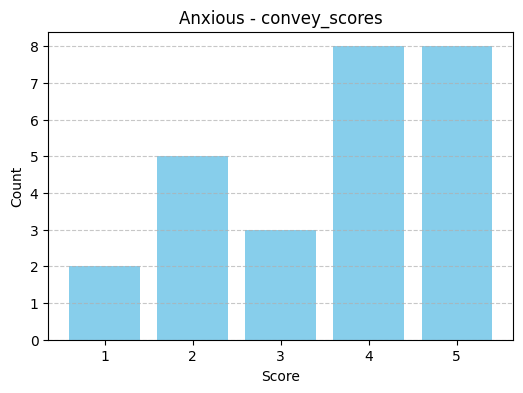

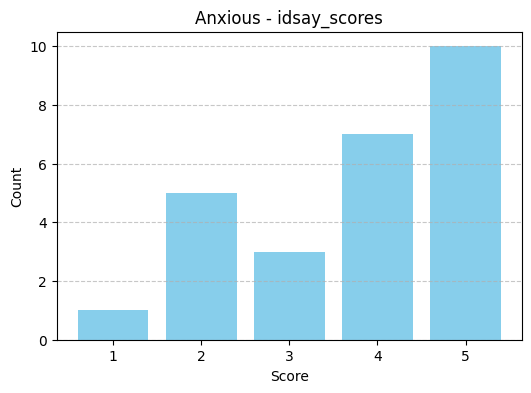

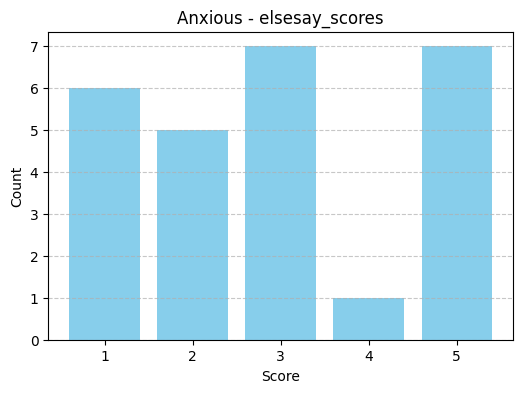

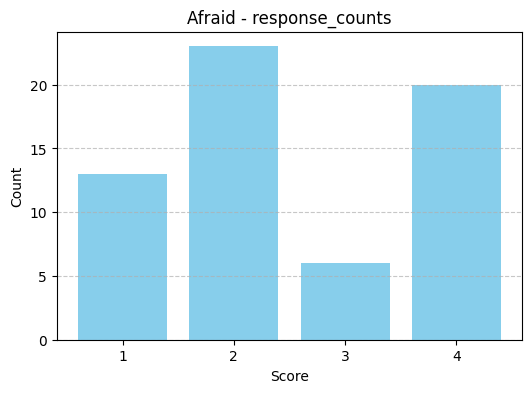

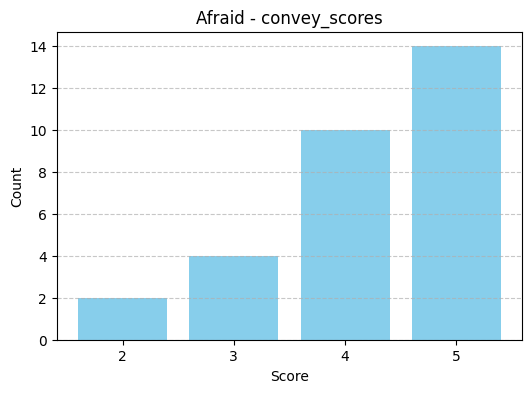

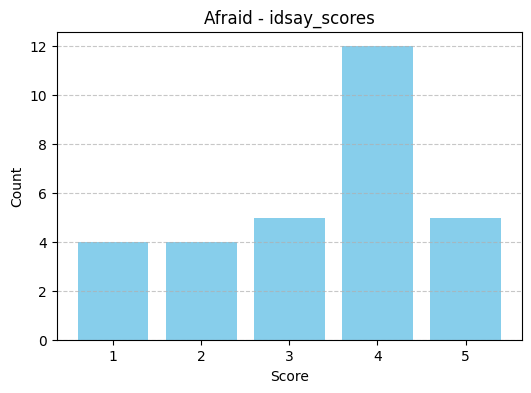

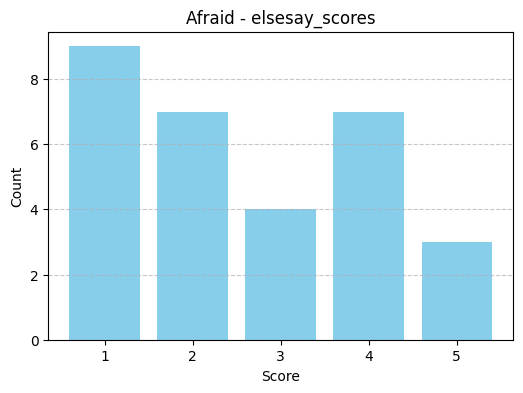

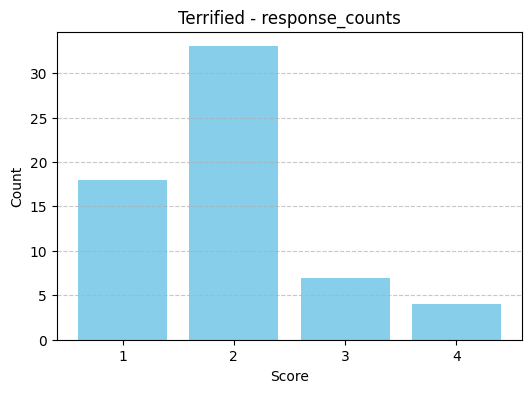

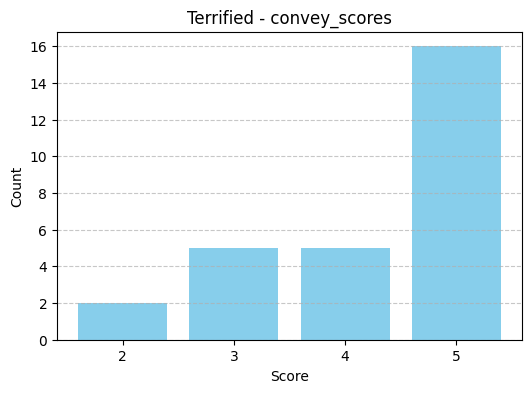

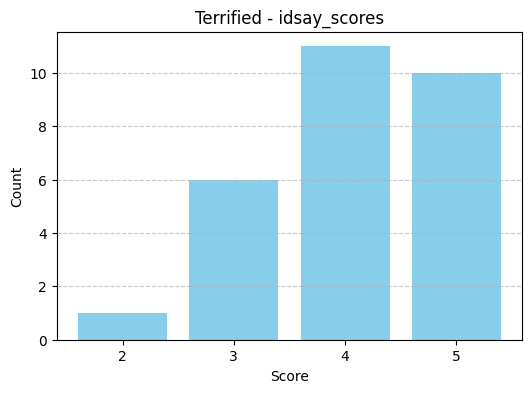

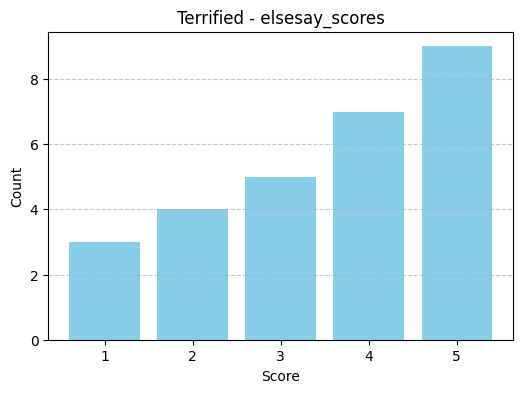

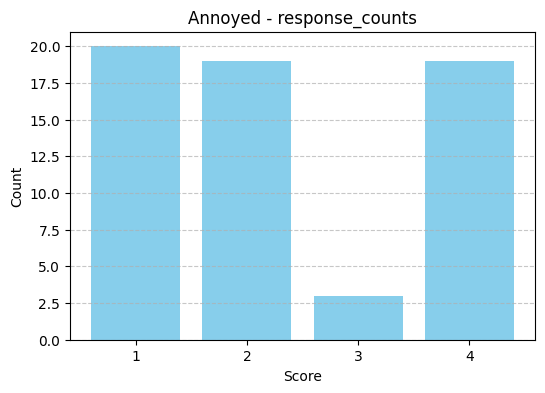

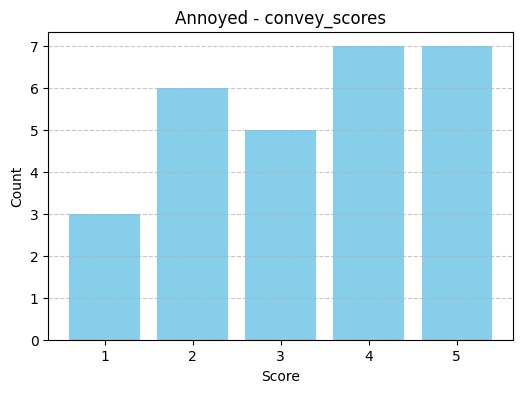

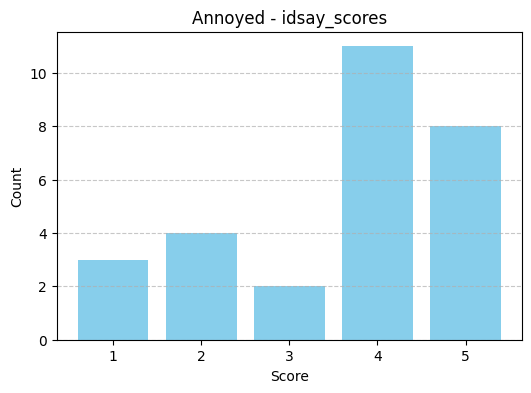

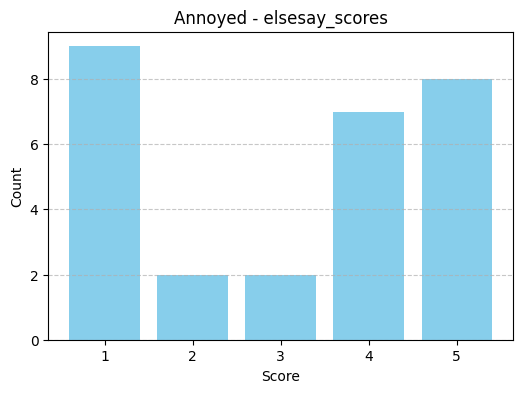

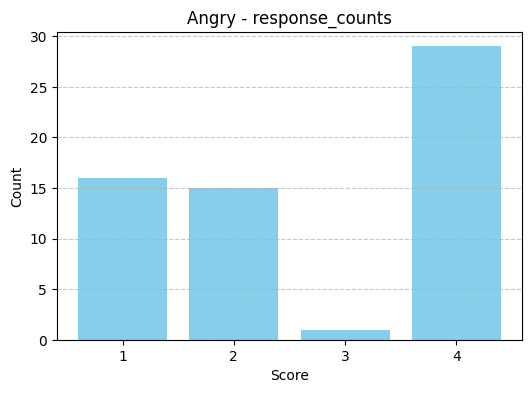

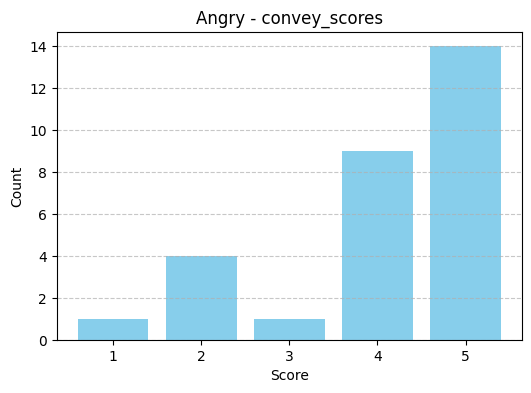

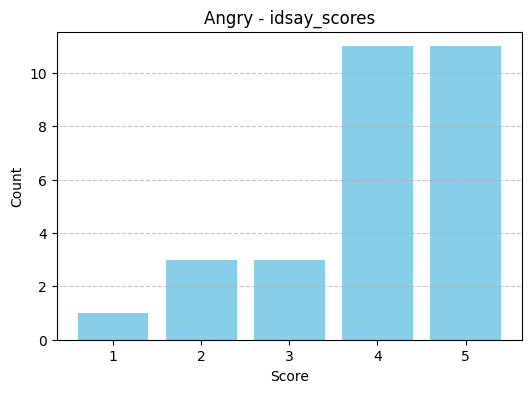

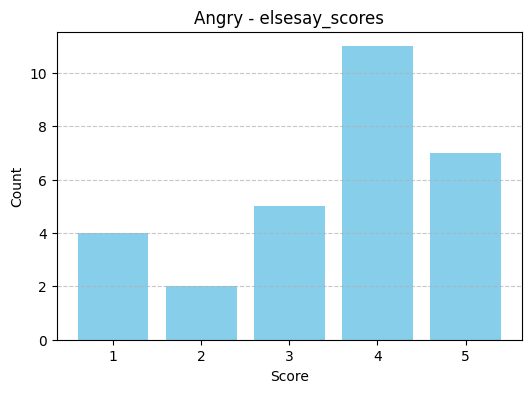

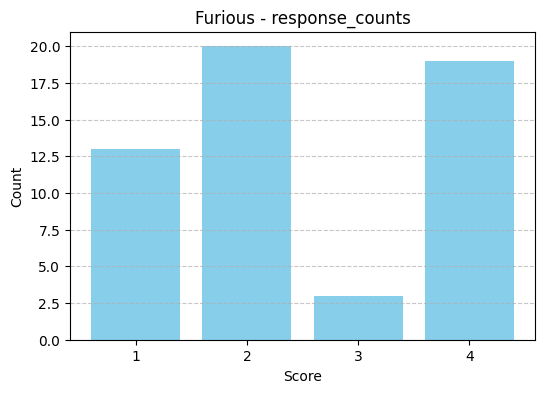

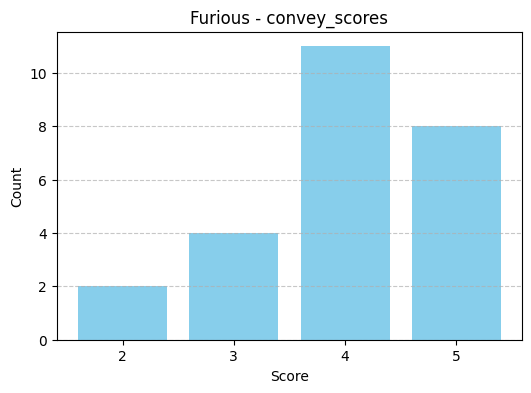

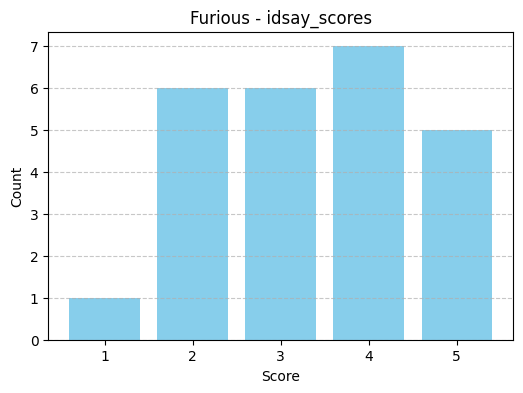

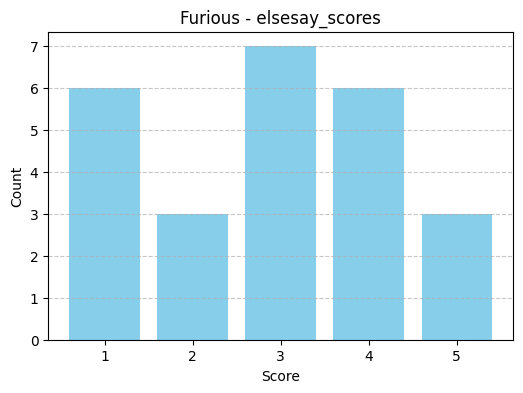

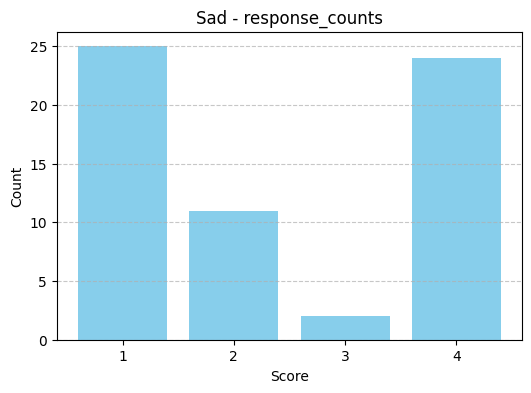

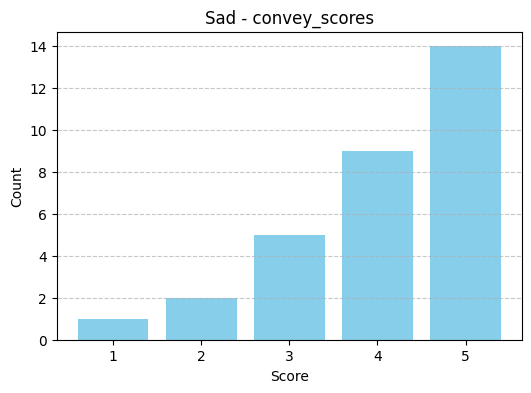

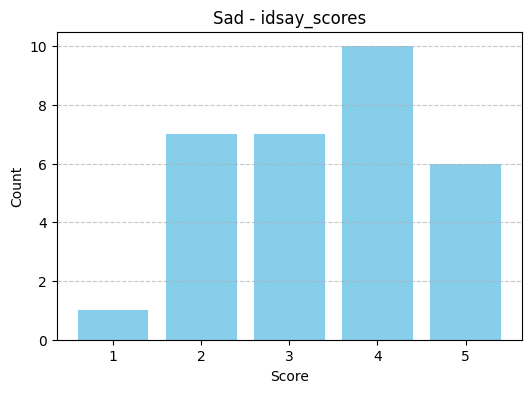

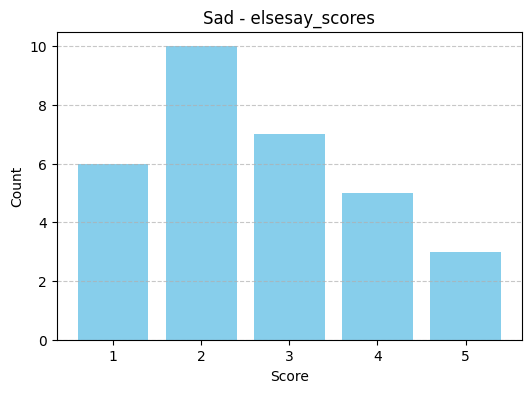

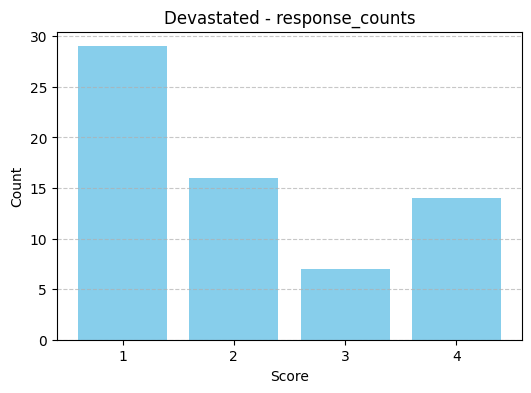

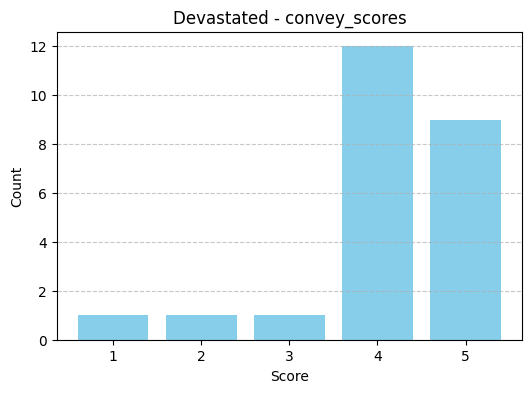

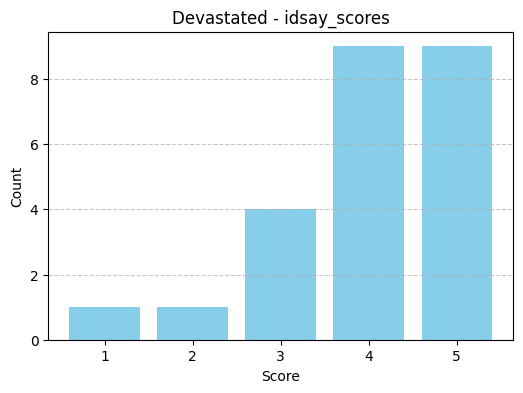

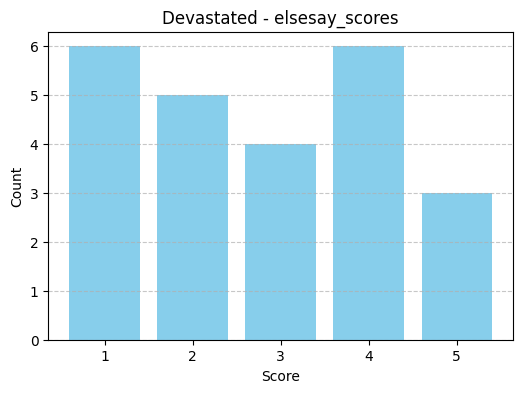

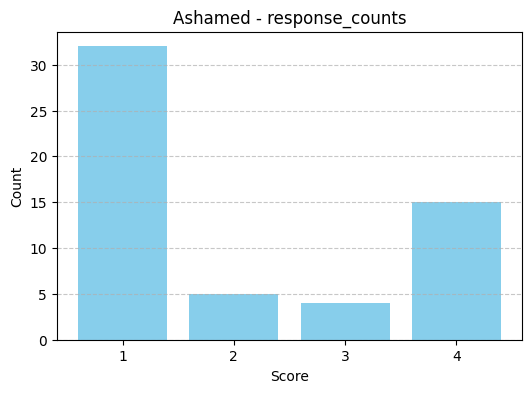

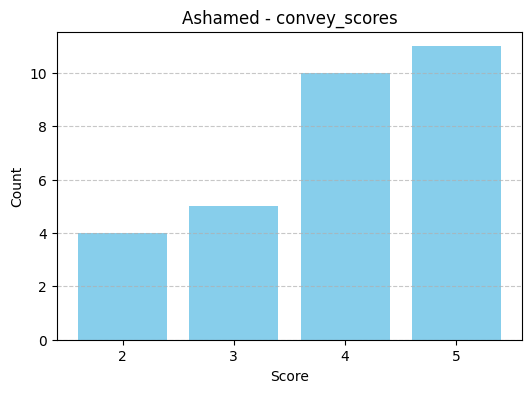

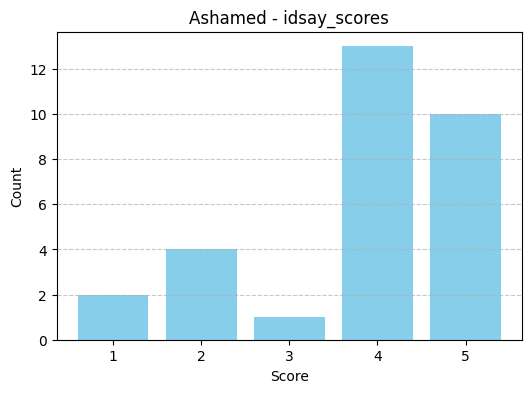

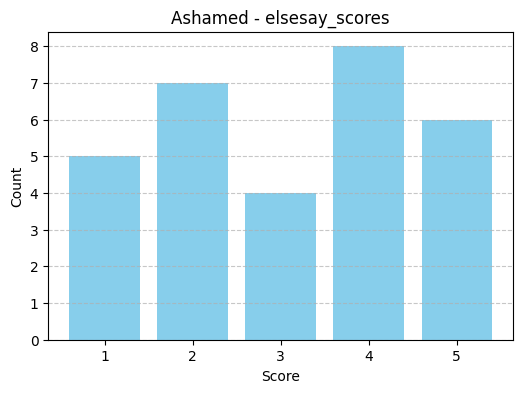

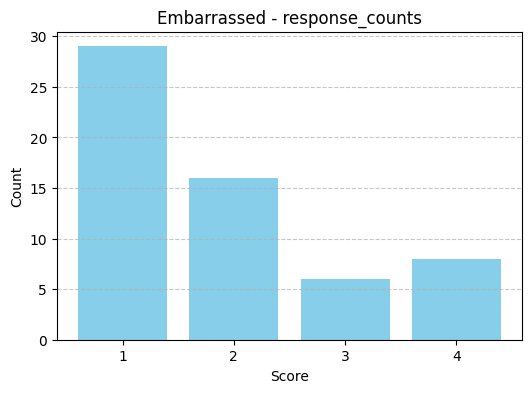

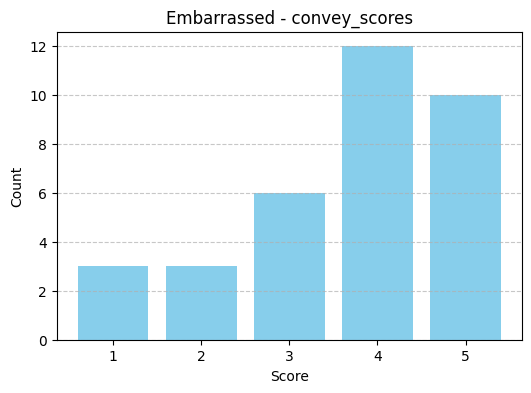

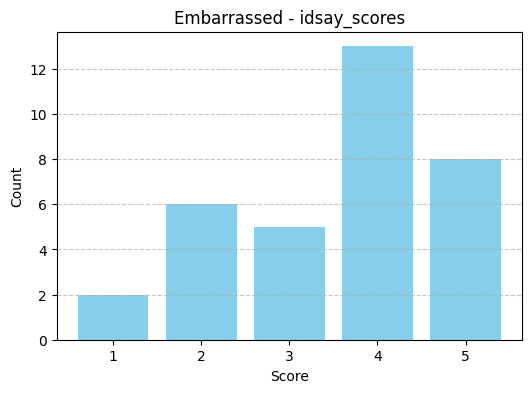

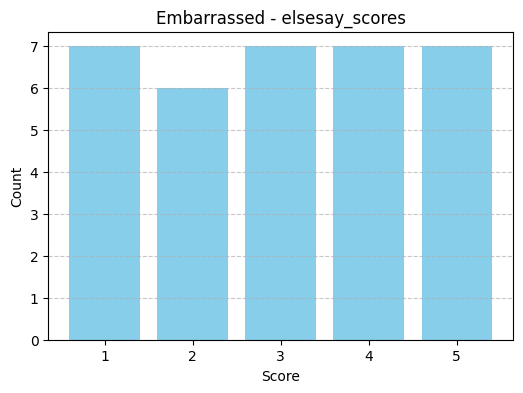

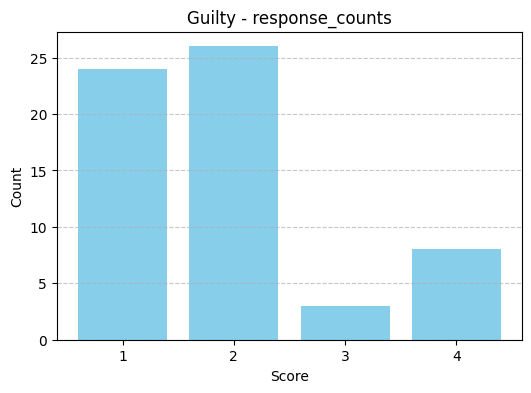

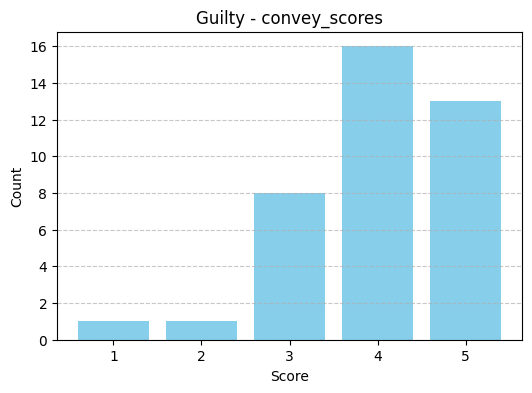

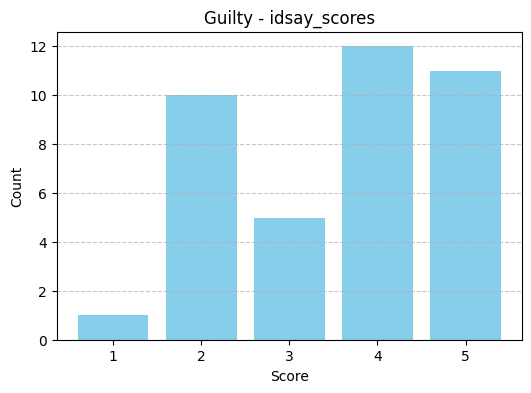

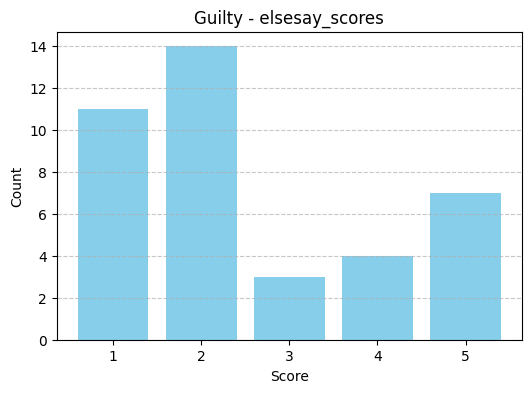

In [53]:
for label, ques_types in per_emo_data.items():
    for type_of_question, responses in ques_types.items():
        plt.figure(figsize=(6, 4))
        plt.bar(responses.keys(), responses.values(), color='skyblue')
        plt.xlabel("Score")
        plt.ylabel("Count")
        plt.title(f"{label} - {type_of_question}")
        plt.xticks(list(responses.keys()))  # Ensure correct tick labels
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

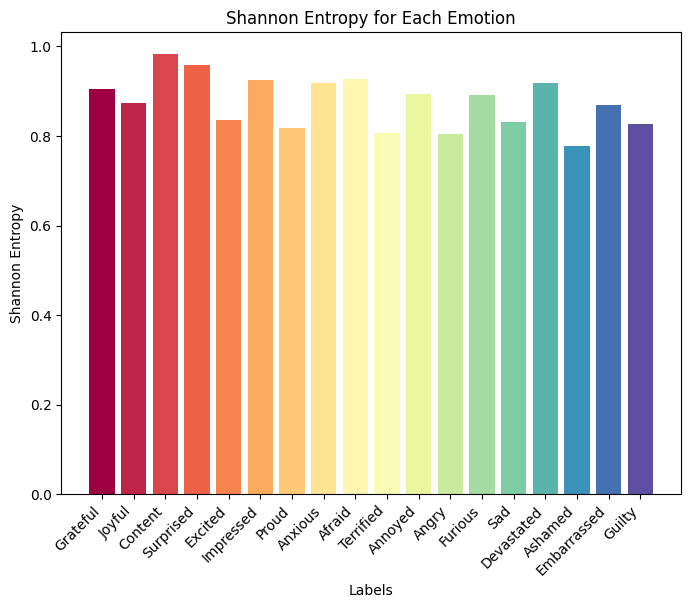

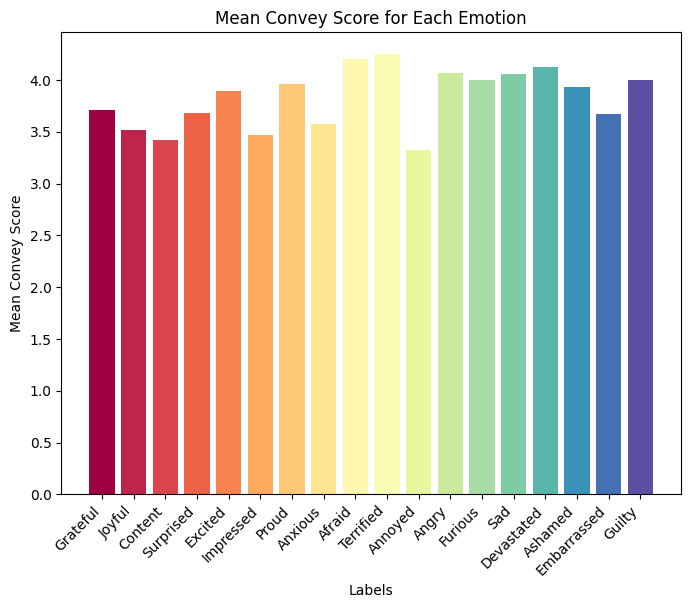

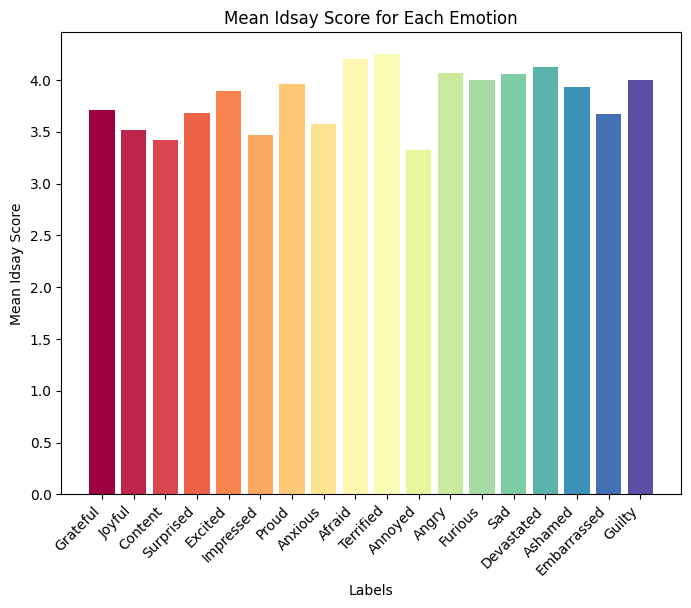

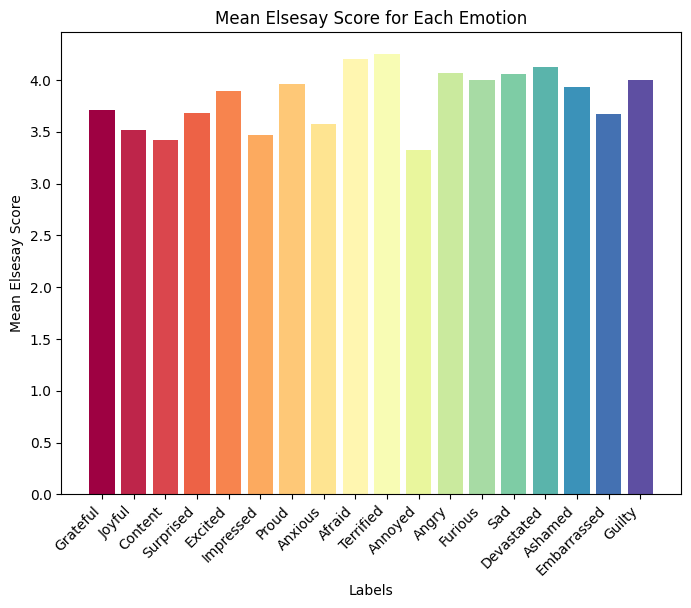

In [54]:
labels = list(per_emo_stats.keys())

colors = cm.Spectral(np.linspace(0, 1, len(labels)))

# Loop over the attributes and create a graph for each
for key in per_emo_stats['Grateful'].keys():
    # Extract values for the current attribute
    values = [per_emo_stats[label][key] for label in labels]

    plt.figure(figsize=(8, 6))
    plt.bar(labels, values, color=colors)
    plt.xlabel('Labels')
    plt.xticks(rotation=45, ha="right")
    plt.ylabel(key.replace('_', ' ').title())
    plt.title(f'{key.replace("_", " ").title()} for Each Emotion')
    plt.show()

# Per-User Tests

In [55]:
all_users = dataset["Q07"].tolist()[:-1]
practice_correct_rate = []
questions_answers = []
question_emotions = []
convey_answers = []
idsay_answers = []
elsesay_answers = []

ctct = 0
for user in all_users:
    filtered_row = (dataset[dataset["Q07"] == user]).iloc[0]
    repr_type = filtered_row["representation_type"]
    filtered_row = filtered_row.dropna()

    if repr_type == "1":
        practice_correct = True if filtered_row["Words_Practice"] == 2 else False
        practice_correct_rate.append(1.0)
        segments = ['Question', 'Convey', 'IdSay', 'ElseSay']

        filtered_columns = [col for col in filtered_row.index if any(sub in col for sub in segments)]
        result = {key: {filtered_row[key]: 1} for key in filtered_columns}

        print(result)
        question_dict = [list(val.keys())[0] for key, val in result.items() if 'Question' in key]
        # convey_dict = {val for key, val in result.items() if 'Convey' in key}
        # idsay_dict = {val for key, val in result.items() if 'IdSay' in key}
        # elsesay_dict = {val for key, val in result.items() if 'ElseSay' in key}

        print(question_dict)

        # questions_answers.append(list(question_dict.values()))
        # convey_answers.append(list(convey_dict.keys()))
        # idsay_answers.append(list(idsay_dict.keys()))
        # elsesay_answers.append(list(elsesay_dict.keys()))

    ctct += 5

    if ctct == 5: break

# [practice_correct,
# question_dict,
# convey_answers,
# idsay_answers,
# elsesay_answers]
# convey_dict
# idsay_dict
# elsesay_dict

{'Words_Question_3': {2: 1}, 'Words_Question_8': {1: 1}, 'Words_Question_9': {2: 1}, 'Words_Question_11': {1: 1}, 'Words_Question_13': {1: 1}, 'Words_Question_22': {4: 1}, 'Words_Question_23': {4: 1}, 'Words_Question_25': {4: 1}, 'Words_Question_27': {1: 1}, 'Words_Question_36': {1: 1}, 'Words_Convey_4': {5: 1}, 'Words_IdSay_4': {5: 1}, 'Words_ElseSay_4': {5: 1}, 'Words_Convey_6': {5: 1}, 'Words_IdSay_6': {5: 1}, 'Words_ElseSay_6': {5: 1}, 'Words_Convey_11': {5: 1}, 'Words_IdSay_11': {4: 1}, 'Words_ElseSay_11': {4: 1}, 'Words_Convey_21': {3: 1}, 'Words_IdSay_21': {2: 1}, 'Words_ElseSay_21': {1: 1}, 'Words_Convey_36': {3: 1}, 'Words_IdSay_36': {3: 1}, 'Words_ElseSay_36': {2: 1}}
[2, 1, 2, 1, 1, 4, 4, 4, 1, 1]


# Statistical Tests

In [56]:
# anova = f_oneway(convey_scores, idsay_scores, elsesay_scores)
# scores are avgs per user
# if p-val < 0.05, do posthoc test (pairways), Tukey's HSD
anova_convey = f_oneway(words_convey_scores, vad_convey_scores, vadnum_convey_scores, emojis_convey_scores)
anova_idsay = f_oneway(words_idsay_scores, vad_idsay_scores, vadnum_idsay_scores, emojis_idsay_scores)
anova_elsesay = f_oneway(words_elsesay_scores, vad_elsesay_scores, vadnum_elsesay_scores, emojis_elsesay_scores)

print("How well does this convey---", anova_convey)
print("How well does this I'd say---", anova_idsay)
print("How well does this someone-else---", anova_elsesay)

How well does this convey--- F_onewayResult(statistic=4.675245017311153, pvalue=0.0041850627046379546)
How well does this I'd say--- F_onewayResult(statistic=4.428624215002653, pvalue=0.0056848950168664515)
How well does this someone-else--- F_onewayResult(statistic=2.661582444573437, pvalue=0.05194169398268065)


In [57]:
pw_thsd_convey = tukey_hsd(words_convey_scores, vad_convey_scores, vadnum_convey_scores, emojis_convey_scores)
pw_thsd_idsay = tukey_hsd(words_idsay_scores, vad_idsay_scores, vadnum_idsay_scores, emojis_idsay_scores)

print("Pairwise test for Convey---", pw_thsd_convey)
print("Pairwise test for I'd say---", pw_thsd_idsay)

Pairwise test for Convey--- Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.282     0.444    -0.211     0.775
 (0 - 2)      0.682     0.002     0.203     1.161
 (0 - 3)      0.305     0.342    -0.170     0.780
 (1 - 0)     -0.282     0.444    -0.775     0.211
 (1 - 2)      0.400     0.143    -0.084     0.884
 (1 - 3)      0.023     0.999    -0.458     0.503
 (2 - 0)     -0.682     0.002    -1.161    -0.203
 (2 - 1)     -0.400     0.143    -0.884     0.084
 (2 - 3)     -0.377     0.156    -0.843     0.089
 (3 - 0)     -0.305     0.342    -0.780     0.170
 (3 - 1)     -0.023     0.999    -0.503     0.458
 (3 - 2)      0.377     0.156    -0.089     0.843

Pairwise test for I'd say--- Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.306     0.472    -0.245     0.858
 (0 - 2)      0.546     0.044     0.010     1.082
 (0 - 

# Generating Charts

In [58]:
plt.rcParams.update({'font.size': 14})  # Set default font size

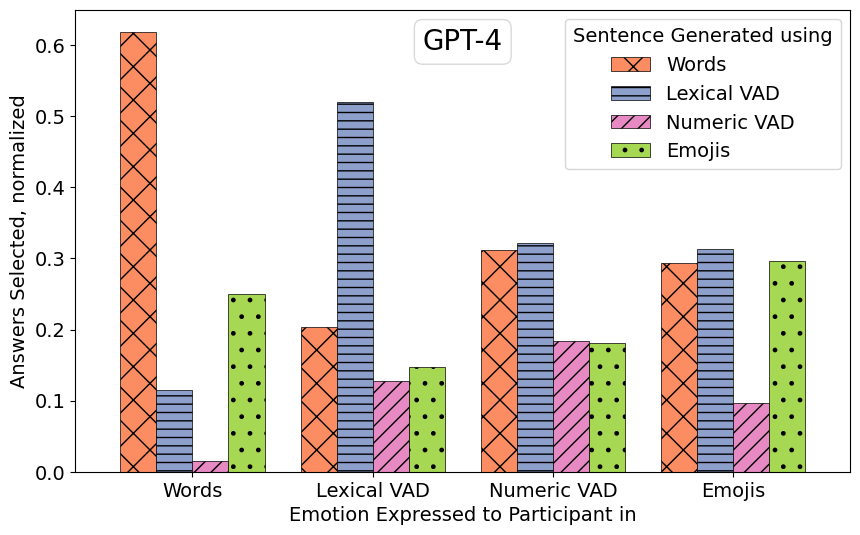

In [130]:
all_words_questions_answers
all_vad_questions_answers
all_vadnum_questions_answers
all_emojis_questions_answers

df_q_a = pd.concat([all_words_questions_answers, all_vad_questions_answers, all_vadnum_questions_answers, all_emojis_questions_answers], axis=1)
df_q_a = df_q_a.T
df_q_a = df_q_a.rename(index={0: "Words", 1: "Lexical VAD", 2: "Numeric VAD", 3: "Emojis"})
df_q_a = df_q_a.rename(columns={"VAD": "Lexical VAD", "Numeric_VAD": "Numeric VAD"})

df_q_a_norm = df_q_a.div(df_q_a.sum(axis=1), axis=0)

colors = {"Words": plt.cm.Set2(1), "Lexical VAD": plt.cm.Set2(2), "Numeric VAD": plt.cm.Set2(3), "Emojis": plt.cm.Set2(4)}
patterns = {"Words": "x", "Lexical VAD": "--", "Numeric VAD": "//", "Emojis": "."}

ax = df_q_a_norm.plot(kind="bar", figsize=(10, 6), width=0.8, color=[colors[label] for label in df_q_a.columns], edgecolor="black", linewidth=0.5)

for i, bar in enumerate(ax.patches):
    if i in range(0, 4):
        bar.set_hatch(patterns["Words"])
    if i in range(4, 8):
        bar.set_hatch(patterns["Lexical VAD"])
    if i in range(8,12):
        bar.set_hatch(patterns["Numeric VAD"])
    if i in range(12, 16):
        bar.set_hatch(patterns["Emojis"])

plt.title("GPT-4", fontsize=20, y=0.895, bbox=dict(edgecolor="black", facecolor="white", boxstyle="round, pad=0.3", alpha=0.15))
plt.xlabel("Emotion Expressed to Participant in")
plt.ylabel("Answers Selected, normalized")
# plt.title("Comparison of Different Series")
plt.legend(title="Sentence Generated using")
plt.xticks(rotation=0)
plt.ylim(0, 0.65)
plt.savefig("figures/GPT4_EmoAlign_Summary.png", dpi=300, bbox_inches="tight")
plt.show()

In [110]:
df_q_a

,Words,Lexical VAD,Numeric VAD,Emojis
Words,161.0,30.0,4.0,65.0
Lexical VAD,51.0,130.0,32.0,37.0
Numeric VAD,93.0,96.0,55.0,54.0
Emojis,85.0,91.0,28.0,86.0


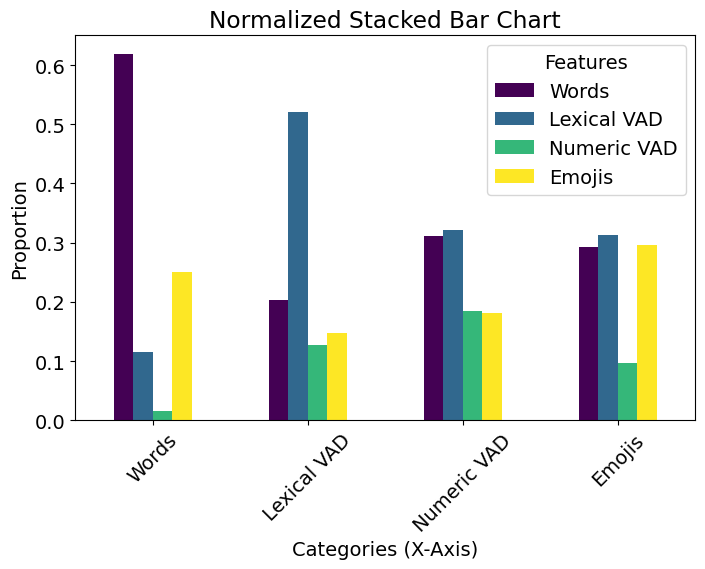

In [111]:
df_normalized = df_q_a.div(df_q_a.sum(axis=1), axis=0)

# Plot the normalized stacked bar chart
ax = df_normalized.plot(kind='bar', stacked=False, figsize=(8, 5), colormap='viridis')

# Labeling
plt.xlabel("Categories (X-Axis)")
plt.ylabel("Proportion")
plt.title("Normalized Stacked Bar Chart")
plt.legend(title="Features")
plt.xticks(rotation=45)

# Show plot
plt.show()

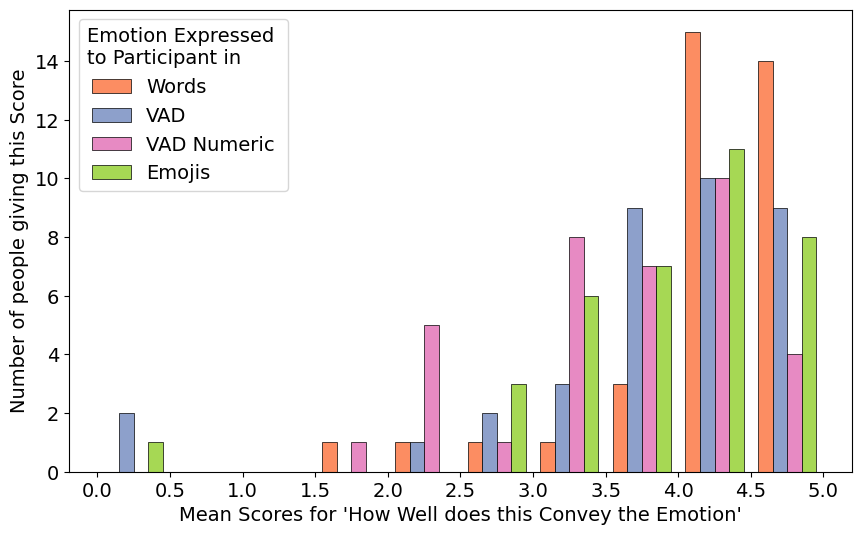

In [112]:
colors = [plt.cm.Set2(1), plt.cm.Set2(2), plt.cm.Set2(3), plt.cm.Set2(4)]

plt.figure(figsize=(10.1, 6))
plt.hist([w_convey_data["Mean_Score"], vad_convey_data["Mean_Score"], vadnum_convey_data["Mean_Score"], emojis_convey_data["Mean_Score"]], bins=10,
         color=colors, label=["Words", "VAD", "VAD Numeric", "Emojis"], edgecolor="black", linewidth=0.5)
plt.xlabel("Mean Scores for 'How Well does this Convey the Emotion'")
plt.ylabel("Number of people giving this Score")
plt.xticks(np.arange(0, 5.5, 0.5))
plt.legend(title="Emotion Expressed \nto Participant in")
plt.show()

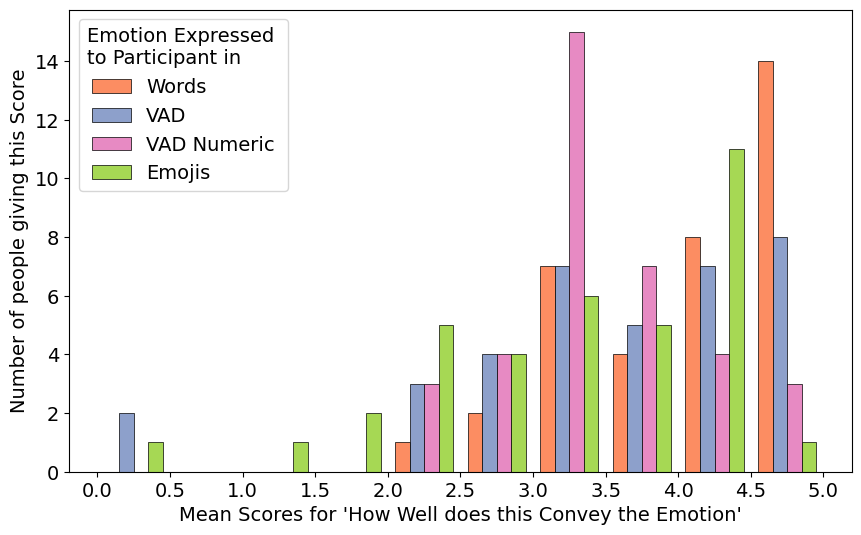

In [113]:
colors = [plt.cm.Set2(1), plt.cm.Set2(2), plt.cm.Set2(3), plt.cm.Set2(4)]

plt.figure(figsize=(10.1, 6))
plt.hist([w_idsay_data["Mean_Score"], vad_idsay_data["Mean_Score"], vadnum_idsay_data["Mean_Score"], emojis_idsay_data["Mean_Score"]], bins=10,
         color=colors, label=["Words", "VAD", "VAD Numeric", "Emojis"], edgecolor="black", linewidth=0.5)
plt.xlabel("Mean Scores for 'How Well does this Convey the Emotion'")
plt.ylabel("Number of people giving this Score")
plt.xticks(np.arange(0, 5.5, 0.5))
plt.legend(title="Emotion Expressed \nto Participant in")
plt.show()

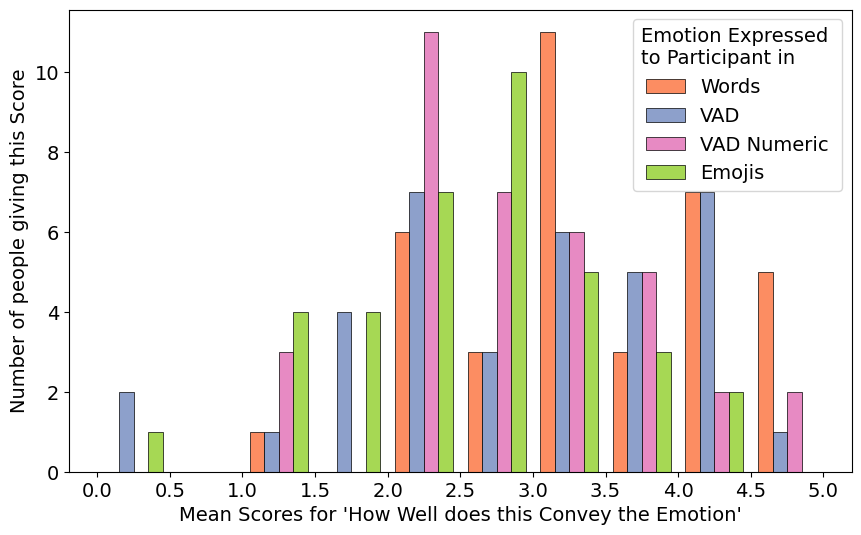

In [114]:
colors = [plt.cm.Set2(1), plt.cm.Set2(2), plt.cm.Set2(3), plt.cm.Set2(4)]

plt.figure(figsize=(10.1, 6))
plt.hist([w_elsesay_data["Mean_Score"], vad_elsesay_data["Mean_Score"], vadnum_elsesay_data["Mean_Score"], emojis_elsesay_data["Mean_Score"]], bins=10,
         color=colors, label=["Words", "VAD", "VAD Numeric", "Emojis"], edgecolor="black", linewidth=0.5)
plt.xlabel("Mean Scores for 'How Well does this Convey the Emotion'")
plt.ylabel("Number of people giving this Score")
plt.xticks(np.arange(0, 5.5, 0.5))
plt.legend(title="Emotion Expressed \nto Participant in")
plt.show()

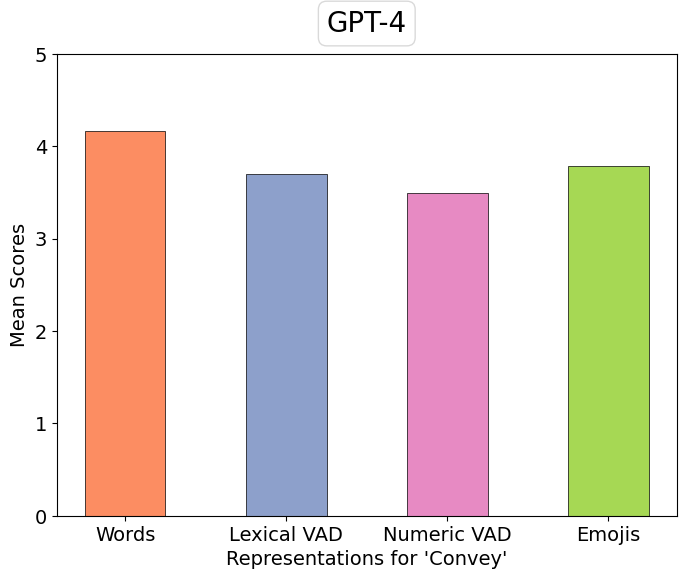

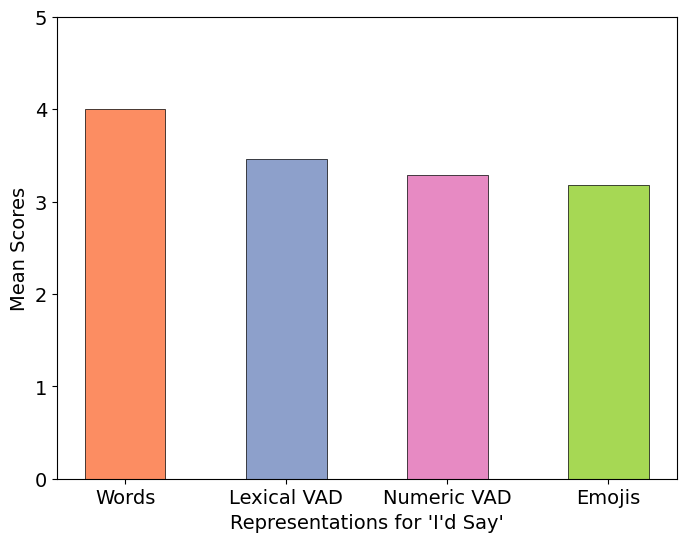

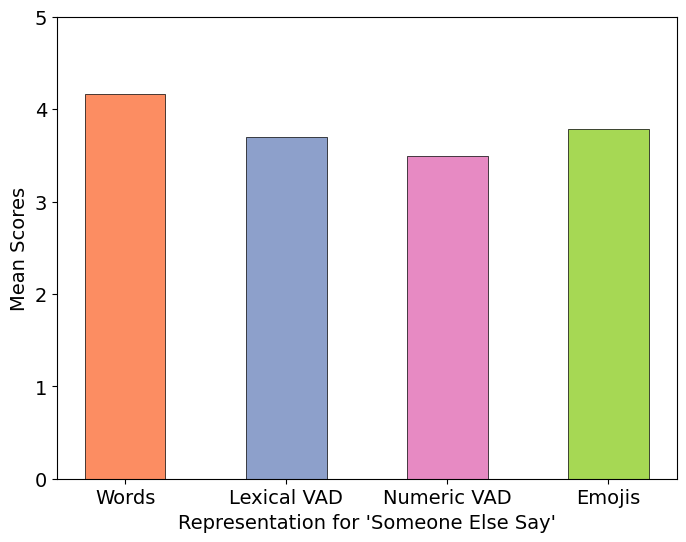

In [115]:
colors = [plt.cm.Set2(1), plt.cm.Set2(2), plt.cm.Set2(3), plt.cm.Set2(4)]

xls = ["Words", "VAD", "VAD Numeric", "Emojis"]

plt.figure(figsize=(8, 6))
plt.bar(
    height=[np.mean(w_convey_data["Mean_Score"]),
    np.mean(vad_convey_data["Mean_Score"]),
    np.mean(vadnum_convey_data["Mean_Score"]),
    np.mean(emojis_convey_data["Mean_Score"])],
         color=colors, x=["Words", "Lexical VAD", "Numeric VAD", "Emojis"], edgecolor="black", linewidth=0.5, width=0.5)

# for i, value in enumerate([np.mean(w_convey_data["Mean_Score"]),
#     np.mean(vad_convey_data["Mean_Score"]),
#     np.mean(vadnum_convey_data["Mean_Score"]),
#     np.mean(emojis_convey_data["Mean_Score"])]):
#     plt.text(xls[i], value - 0.2, str(round(value, 2)), ha='center', va='top', fontsize=16, color='black')

plt.xlabel("Representations for 'Convey'")
plt.ylabel("Mean Scores")
plt.ylim(0.0, 5.0)
plt.title("GPT-4", fontsize=20, y=1.03, bbox=dict(edgecolor="black", facecolor="white", boxstyle="round, pad=0.3", alpha=0.15))
plt.savefig("figures/WordsConveySummary_gpt4.png", dpi=300, bbox_inches="tight")
plt.show()


plt.figure(figsize=(8, 6))
plt.bar(
    height=[np.mean(w_idsay_data["Mean_Score"]),
    np.mean(vad_idsay_data["Mean_Score"]),
    np.mean(vadnum_idsay_data["Mean_Score"]),
    np.mean(emojis_idsay_data["Mean_Score"])],
         color=colors, x=["Words", "Lexical VAD", "Numeric VAD", "Emojis"], edgecolor="black", linewidth=0.5, width=0.5)
plt.xlabel("Representations for 'I'd Say'")
plt.ylabel("Mean Scores")
plt.ylim(0.0, 5.0)
plt.savefig("figures/WordsIdSaySummary_gpt4.png", dpi=300, bbox_inches="tight")
plt.show()

colors = [plt.cm.Set2(1), plt.cm.Set2(2), plt.cm.Set2(3), plt.cm.Set2(4)]

plt.figure(figsize=(8, 6))
plt.bar(
    height=[np.mean(w_convey_data["Mean_Score"]),
    np.mean(vad_convey_data["Mean_Score"]),
    np.mean(vadnum_convey_data["Mean_Score"]),
    np.mean(emojis_convey_data["Mean_Score"])],
         color=colors, x=["Words", "Lexical VAD", "Numeric VAD", "Emojis"], edgecolor="black", linewidth=0.5, width=0.5)
plt.xlabel("Representation for 'Someone Else Say'")
plt.ylabel("Mean Scores")
plt.ylim(0.0, 5.0)
plt.savefig("figures/WordsElseSaySummary_gpt4.png", dpi=300, bbox_inches="tight")
plt.show()

In [116]:
per_emo_words_data = {}
per_emo_words_stats = {}
reprs_to_exclude = [item for item in list(per_emo_dataset.columns) if any(s in item for s in ["VAD", "VADNum", "Emojis"])]
per_emo_words_dataset = dataset.drop(columns=reprs_to_exclude)[:-1]

# per_emo_words_dataset[questions_cols]

for nm, em in enumerate(list_of_emotions, start=1):
    columns_per_emo[em] = [col for col in per_emo_words_dataset.columns if col.endswith(f"_{nm*2-1}") or col.endswith(f"_{nm*2}")]
    # print("Current Emotion:", em)

    curr_emo_data = {}
    curr_emo_stats = {}
    questions_cols = [col for col in columns_per_emo[em] if 'Question' in col]
    convey_cols = [col for col in columns_per_emo[em] if 'Convey' in col]
    idsay_cols = [col for col in columns_per_emo[em] if 'IdSay' in col]
    elsesay_cols = [col for col in columns_per_emo[em] if 'ElseSay' in col]

    curr_emo_data["response_counts"] = per_emo_words_dataset[questions_cols].stack().value_counts().sort_index().to_dict()

    curr_emo_data["convey_scores"] = per_emo_words_dataset[convey_cols].stack().value_counts().sort_index().to_dict()
    curr_emo_data["idsay_scores"] = per_emo_words_dataset[idsay_cols].stack().value_counts().sort_index().to_dict()
    curr_emo_data["elsesay_scores"] = per_emo_words_dataset[elsesay_cols].stack().value_counts().sort_index().to_dict()

    curr_emo_stats["shannon_entropy"] = entropy([val/sum(curr_emo_data["response_counts"].values()) for val in curr_emo_data["response_counts"].values()], base=4)
    curr_emo_stats["mean_convey_score"] = sum(key*val for key, val in curr_emo_data["convey_scores"].items())/sum(curr_emo_data["convey_scores"].values())
    curr_emo_stats["mean_idsay_score"] = sum(key*val for key, val in curr_emo_data["convey_scores"].items())/sum(curr_emo_data["convey_scores"].values())
    curr_emo_stats["mean_elsesay_score"] = sum(key*val for key, val in curr_emo_data["convey_scores"].items())/sum(curr_emo_data["convey_scores"].values())

    per_emo_words_data[em] = curr_emo_data
    per_emo_words_stats[em] = curr_emo_stats

per_emo_words_stats

{'Grateful': {'shannon_entropy': 0.0,
  'mean_convey_score': 4.333333333333333,
  'mean_idsay_score': 4.333333333333333,
  'mean_elsesay_score': 4.333333333333333},
 'Joyful': {'shannon_entropy': 0.7609640474436813,
  'mean_convey_score': 3.272727272727273,
  'mean_idsay_score': 3.272727272727273,
  'mean_elsesay_score': 3.272727272727273},
 'Content': {'shannon_entropy': 0.5794692661751386,
  'mean_convey_score': 4.666666666666667,
  'mean_idsay_score': 4.666666666666667,
  'mean_elsesay_score': 4.666666666666667},
 'Surprised': {'shannon_entropy': 0.5990919739558995,
  'mean_convey_score': 4.125,
  'mean_idsay_score': 4.125,
  'mean_elsesay_score': 4.125},
 'Excited': {'shannon_entropy': 0.782798115178801,
  'mean_convey_score': 3.3,
  'mean_idsay_score': 3.3,
  'mean_elsesay_score': 3.3},
 'Impressed': {'shannon_entropy': 0.17667966751071065,
  'mean_convey_score': 3.5714285714285716,
  'mean_idsay_score': 3.5714285714285716,
  'mean_elsesay_score': 3.5714285714285716},
 'Proud': {'

In [117]:
per_emo_vad_data = {}
per_emo_vad_stats = {}
reprs_to_exclude = [item for item in list(per_emo_dataset.columns) if any(s in item for s in ["Words", "VADNum", "Emojis"])]
per_emo_vad_dataset = dataset.drop(columns=reprs_to_exclude)[:-1]

for nm, em in enumerate(list_of_emotions, start=1):
    columns_per_emo[em] = [col for col in per_emo_vad_dataset.columns if col.endswith(f"_{nm*2-1}") or col.endswith(f"_{nm*2}")]
    # print("Current Emotion:", em)

    curr_emo_data = {}
    curr_emo_stats = {}
    questions_cols = [col for col in columns_per_emo[em] if 'Question' in col]
    convey_cols = [col for col in columns_per_emo[em] if 'Convey' in col]
    idsay_cols = [col for col in columns_per_emo[em] if 'IdSay' in col]
    elsesay_cols = [col for col in columns_per_emo[em] if 'ElseSay' in col]

    curr_emo_data["response_counts"] = per_emo_vad_dataset[questions_cols].stack().value_counts().sort_index().to_dict()

    curr_emo_data["convey_scores"] = per_emo_vad_dataset[convey_cols].stack().value_counts().sort_index().to_dict()
    curr_emo_data["idsay_scores"] = per_emo_vad_dataset[idsay_cols].stack().value_counts().sort_index().to_dict()
    curr_emo_data["elsesay_scores"] = per_emo_vad_dataset[elsesay_cols].stack().value_counts().sort_index().to_dict()

    curr_emo_stats["shannon_entropy"] = entropy([val/sum(curr_emo_data["response_counts"].values()) for val in curr_emo_data["response_counts"].values()], base=4)
    curr_emo_stats["mean_convey_score"] = sum(key*val for key, val in curr_emo_data["convey_scores"].items())/sum(curr_emo_data["convey_scores"].values())
    curr_emo_stats["mean_idsay_score"] = sum(key*val for key, val in curr_emo_data["convey_scores"].items())/sum(curr_emo_data["convey_scores"].values())
    curr_emo_stats["mean_elsesay_score"] = sum(key*val for key, val in curr_emo_data["convey_scores"].items())/sum(curr_emo_data["convey_scores"].values())

    per_emo_vad_data[em] = curr_emo_data
    per_emo_vad_stats[em] = curr_emo_stats

per_emo_vad_stats

{'Grateful': {'shannon_entropy': 0.8514097655573916,
  'mean_convey_score': 4.428571428571429,
  'mean_idsay_score': 4.428571428571429,
  'mean_elsesay_score': 4.428571428571429},
 'Joyful': {'shannon_entropy': 0.5700578392573046,
  'mean_convey_score': 3.5,
  'mean_idsay_score': 3.5,
  'mean_elsesay_score': 3.5},
 'Content': {'shannon_entropy': 0.3096910973393819,
  'mean_convey_score': 4.428571428571429,
  'mean_idsay_score': 4.428571428571429,
  'mean_elsesay_score': 4.428571428571429},
 'Surprised': {'shannon_entropy': 0.8345901684333654,
  'mean_convey_score': 3.5,
  'mean_idsay_score': 3.5,
  'mean_elsesay_score': 3.5},
 'Excited': {'shannon_entropy': 0.6760150508789764,
  'mean_convey_score': 4.0,
  'mean_idsay_score': 4.0,
  'mean_elsesay_score': 4.0},
 'Impressed': {'shannon_entropy': 0.7157801421416576,
  'mean_convey_score': 3.375,
  'mean_idsay_score': 3.375,
  'mean_elsesay_score': 3.375},
 'Proud': {'shannon_entropy': 0.6209730161030229,
  'mean_convey_score': 4.5,
  'mea

In [118]:
per_emo_vadnum_data = {}
per_emo_vadnum_stats = {}
reprs_to_exclude = [item for item in list(per_emo_dataset.columns) if any(s in item for s in ["Words", "VAD_", "Emojis"])]
per_emo_vadnum_dataset = dataset.drop(columns=reprs_to_exclude)[:-1]



for nm, em in enumerate(list_of_emotions, start=1):
    columns_per_emo[em] = [col for col in per_emo_vadnum_dataset.columns if col.endswith(f"_{nm*2-1}") or col.endswith(f"_{nm*2}")]
    # print("Current Emotion:", em)

    curr_emo_data = {}
    curr_emo_stats = {}
    questions_cols = [col for col in columns_per_emo[em] if 'Question' in col]
    convey_cols = [col for col in columns_per_emo[em] if 'Convey' in col]
    idsay_cols = [col for col in columns_per_emo[em] if 'IdSay' in col]
    elsesay_cols = [col for col in columns_per_emo[em] if 'ElseSay' in col]

    curr_emo_data["response_counts"] = per_emo_vadnum_dataset[questions_cols].stack().value_counts().sort_index().to_dict()

    curr_emo_data["convey_scores"] = per_emo_vadnum_dataset[convey_cols].stack().value_counts().sort_index().to_dict()
    curr_emo_data["idsay_scores"] = per_emo_vadnum_dataset[idsay_cols].stack().value_counts().sort_index().to_dict()
    curr_emo_data["elsesay_scores"] = per_emo_vadnum_dataset[elsesay_cols].stack().value_counts().sort_index().to_dict()

    curr_emo_stats["shannon_entropy"] = entropy([val/sum(curr_emo_data["response_counts"].values()) for val in curr_emo_data["response_counts"].values()], base=4)
    curr_emo_stats["mean_convey_score"] = sum(key*val for key, val in curr_emo_data["convey_scores"].items())/sum(curr_emo_data["convey_scores"].values())
    curr_emo_stats["mean_idsay_score"] = sum(key*val for key, val in curr_emo_data["convey_scores"].items())/sum(curr_emo_data["convey_scores"].values())
    curr_emo_stats["mean_elsesay_score"] = sum(key*val for key, val in curr_emo_data["convey_scores"].items())/sum(curr_emo_data["convey_scores"].values())

    per_emo_vadnum_data[em] = curr_emo_data
    per_emo_vadnum_stats[em] = curr_emo_stats

per_emo_vadnum_stats

{'Grateful': {'shannon_entropy': 0.745234285366414,
  'mean_convey_score': 3.3846153846153846,
  'mean_idsay_score': 3.3846153846153846,
  'mean_elsesay_score': 3.3846153846153846},
 'Joyful': {'shannon_entropy': 0.9248008763572908,
  'mean_convey_score': 3.625,
  'mean_idsay_score': 3.625,
  'mean_elsesay_score': 3.625},
 'Content': {'shannon_entropy': 0.9439592513355665,
  'mean_convey_score': 2.3636363636363638,
  'mean_idsay_score': 2.3636363636363638,
  'mean_elsesay_score': 2.3636363636363638},
 'Surprised': {'shannon_entropy': 0.875,
  'mean_convey_score': 3.8,
  'mean_idsay_score': 3.8,
  'mean_elsesay_score': 3.8},
 'Excited': {'shannon_entropy': 0.7128025995084719,
  'mean_convey_score': 4.2,
  'mean_idsay_score': 4.2,
  'mean_elsesay_score': 4.2},
 'Impressed': {'shannon_entropy': 0.7118974703476993,
  'mean_convey_score': 3.625,
  'mean_idsay_score': 3.625,
  'mean_elsesay_score': 3.625},
 'Proud': {'shannon_entropy': 0.9232196723355078,
  'mean_convey_score': 3.9,
  'mean_

In [119]:
per_emo_emojis_data = {}
per_emo_emojis_stats = {}
reprs_to_exclude = [item for item in list(per_emo_dataset.columns) if any(s in item for s in ["Words", "VAD", "VADNum"])]
per_emo_emojis_dataset = dataset.drop(columns=reprs_to_exclude)[:-1]

for nm, em in enumerate(list_of_emotions, start=1):
    columns_per_emo[em] = [col for col in per_emo_emojis_dataset.columns if col.endswith(f"_{nm*2-1}") or col.endswith(f"_{nm*2}")]
    # print("Current Emotion:", em)

    curr_emo_data = {}
    curr_emo_stats = {}
    questions_cols = [col for col in columns_per_emo[em] if 'Question' in col]
    convey_cols = [col for col in columns_per_emo[em] if 'Convey' in col]
    idsay_cols = [col for col in columns_per_emo[em] if 'IdSay' in col]
    elsesay_cols = [col for col in columns_per_emo[em] if 'ElseSay' in col]

    curr_emo_data["response_counts"] = per_emo_emojis_dataset[questions_cols].stack().value_counts().sort_index().to_dict()

    curr_emo_data["convey_scores"] = per_emo_emojis_dataset[convey_cols].stack().value_counts().sort_index().to_dict()
    curr_emo_data["idsay_scores"] = per_emo_emojis_dataset[idsay_cols].stack().value_counts().sort_index().to_dict()
    curr_emo_data["elsesay_scores"] = per_emo_emojis_dataset[elsesay_cols].stack().value_counts().sort_index().to_dict()

    curr_emo_stats["shannon_entropy"] = entropy([val/sum(curr_emo_data["response_counts"].values()) for val in curr_emo_data["response_counts"].values()], base=4)
    curr_emo_stats["mean_convey_score"] = sum(key*val for key, val in curr_emo_data["convey_scores"].items())/sum(curr_emo_data["convey_scores"].values())
    curr_emo_stats["mean_idsay_score"] = sum(key*val for key, val in curr_emo_data["convey_scores"].items())/sum(curr_emo_data["convey_scores"].values())
    curr_emo_stats["mean_elsesay_score"] = sum(key*val for key, val in curr_emo_data["convey_scores"].items())/sum(curr_emo_data["convey_scores"].values())

    per_emo_emojis_data[em] = curr_emo_data
    per_emo_emojis_stats[em] = curr_emo_stats

per_emo_emojis_stats

{'Grateful': {'shannon_entropy': 0.8447411335095912,
  'mean_convey_score': 3.2222222222222223,
  'mean_idsay_score': 3.2222222222222223,
  'mean_elsesay_score': 3.2222222222222223},
 'Joyful': {'shannon_entropy': 0.8228556852037893,
  'mean_convey_score': 3.8333333333333335,
  'mean_idsay_score': 3.8333333333333335,
  'mean_elsesay_score': 3.8333333333333335},
 'Content': {'shannon_entropy': 0.9886085007312413,
  'mean_convey_score': 3.111111111111111,
  'mean_idsay_score': 3.111111111111111,
  'mean_elsesay_score': 3.111111111111111},
 'Surprised': {'shannon_entropy': 0.7313776131322518,
  'mean_convey_score': 3.3636363636363638,
  'mean_idsay_score': 3.3636363636363638,
  'mean_elsesay_score': 3.3636363636363638},
 'Excited': {'shannon_entropy': 0.8447411335095912,
  'mean_convey_score': 4.5,
  'mean_idsay_score': 4.5,
  'mean_elsesay_score': 4.5},
 'Impressed': {'shannon_entropy': 0.9856676426534905,
  'mean_convey_score': 3.2857142857142856,
  'mean_idsay_score': 3.285714285714285

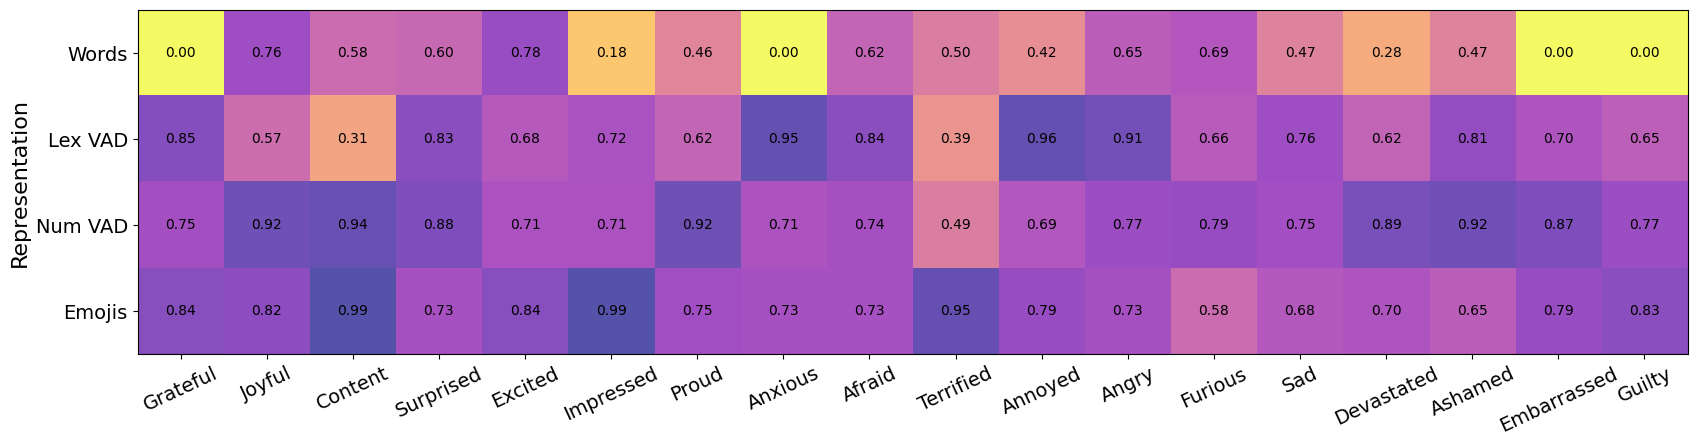

In [120]:
emotions_list = list(per_emo_words_stats.keys())

shannon_entropy_values = []
for data in [per_emo_words_stats, per_emo_vad_stats, per_emo_vadnum_stats, per_emo_emojis_stats]:
    shannon_entropy_values.append([data[emotion]['shannon_entropy'] for emotion in emotions_list])

shannon_entropy_data = np.array(shannon_entropy_values)

shannon_entropy_df = pd.DataFrame(shannon_entropy_values, columns=emotions_list, index=['Words', 'VAD', 'VADNum', 'Emojis'])

plt.figure(figsize=(20, 12))
cax = plt.imshow(shannon_entropy_df, cmap="plasma_r", alpha=0.7, interpolation='nearest')


plt.xticks(ticks=np.arange(18), labels=emotions_list)
plt.yticks(ticks=np.arange(4), labels=['Words', 'Lex VAD', 'Num VAD', 'Emojis'])

for i in range(4):
    for j in range(18):
        value = shannon_entropy_data[i, j]
        plt.text(j, i, f'{value:.2f}', ha='center', va='center', color='black', fontsize=10)

# plt.title("Heatmap of Shannon Entropy Values per Emotion and Representation")
# plt.xlabel("Emotion", fontsize=14)
plt.xticks(rotation=25, ha="center")
plt.ylabel("Representation", fontsize=16)
plt.savefig("figures/Shannon_Entropy_Per_Emotion_Representation_GPT-4.png", dpi=300, bbox_inches="tight")
plt.show()

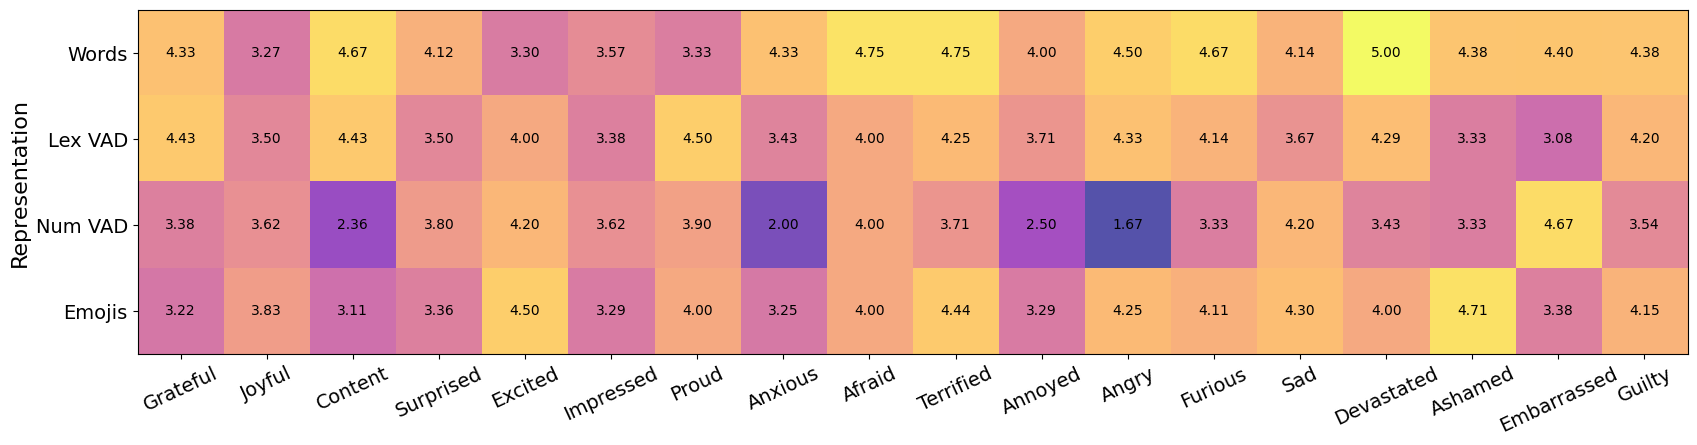

In [121]:
mean_convey_values = []
for data in [per_emo_words_stats, per_emo_vad_stats, per_emo_vadnum_stats, per_emo_emojis_stats]:
    mean_convey_values.append([data[emotion]['mean_convey_score'] for emotion in emotions_list])

mean_convey_data = np.array(mean_convey_values)

mean_convey_df = pd.DataFrame(mean_convey_values, columns=emotions_list, index=['Words', 'VAD', 'VADNum', 'Emojis'])

plt.figure(figsize=(20, 12))
cax = plt.imshow(mean_convey_df, cmap="plasma", alpha=0.7, interpolation='nearest')


plt.xticks(ticks=np.arange(18), labels=emotions_list)
plt.yticks(ticks=np.arange(4), labels=['Words', 'Lex VAD', 'Num VAD', 'Emojis'])

for i in range(4):
    for j in range(18):
        value = mean_convey_data[i, j]
        plt.text(j, i, f'{value:.2f}', ha='center', va='center', color='black', fontsize=10)

# plt.title("Heatmap of Shannon Entropy Values per Emotion and Representation")
# plt.xlabel("Emotion", fontsize=14)
plt.xticks(rotation=25, ha="center")
plt.ylabel("Representation", fontsize=16)
plt.savefig("figures/Mean_Convey_Per_Emotion_Representation_GPT-4.png", dpi=300, bbox_inches="tight")
plt.show()

In [122]:
df_q_a_vals = pd.concat([all_words_questions_answers, all_vad_questions_answers, all_vadnum_questions_answers, all_emojis_questions_answers], axis=1)
df_q_a_vals = df_q_a_vals.T
df_q_a_vals = df_q_a_vals.rename(index={0: "Words", 1: "VAD", 2: "Numeric_VAD", 3: "Emojis"})

df_q_a_vals
diagonal_values = np.diag(df_q_a_vals)
row_sums = df_q_a.sum(axis=1)

result = (diagonal_values / row_sums) * 100
print(result)


Words          61.923077
Lexical VAD    52.000000
Numeric VAD    18.456376
Emojis         29.655172
dtype: float64
